### 1. Setting Up the Working Environment

In [1]:
### Import required packages
import re, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
%matplotlib inline

from statsmodels.formula.api import ols
from statsmodels.tsa.seasonal import seasonal_decompose
import sklearn as sk
from sklearn.metrics import mean_squared_error
from IPython.core.display import display, HTML

In [2]:
### Setting up the working environment
display(HTML("<style>div.output_scroll { height: 31em; }</style>"))
pl.rcParams['figure.figsize'] = 12, 6
pl.rcParams['lines.linewidth'] = 1
pl.rcParams['lines.markersize'] = 1

if os.name == 'nt':
    #Windows:
    try:
        os.chdir(os.environ['USERPROFILE'] + '\Documents' + r"\0_Teach\data")
    except:
        #assume file is in current folder
        pass
else:
    #Mac:
    try:
        os.chdir('/Users/' + os.environ['USER'] + '/Documents' + r"/0_Teach/data")
    except:
        #assume file is in current folder
        pass
print('"'+os.getcwd()+'" is the current folder in the','Windows' if os.name == 'nt' else os.name,'operating system.\n')

"C:\Users\Kai Jing\Desktop\NUS\Business (Accountancy)\NUS BAC\Sem 3.2\DBA3803 - Predictive Analytics in Business\Assignment 2" is the current folder in the Windows operating system.



### 2. Loading and Preparing the Data 

In [3]:
### Loading the dataset into Python as Pandas DataFrame object
d = pd.read_excel('TBill-Dows-CPI-STI-FTSE-UKBirthsDeaths-BitCoin.xlsx', index_col=0, header=1)
d = d[['England & Wales Deaths']]
d['Year'] = d.index.year

rename_columns = {}

for column_name in list(d.columns):
    ## Go through each column name and check if it contains non-alphanumeric
    if re.search('\W', column_name):
        ## Remove non-alphanumeric at the start or end of the column names or replace with '_' if in the middle
        new_name = re.sub('^\W+', '', column_name)
        new_name = re.sub('\W+$', '', new_name)
        rename_columns.update({column_name: re.sub('\W+', '_', new_name)})

d.rename(columns=rename_columns,
          inplace=True)

print(list(d.columns))

['England_Wales_Deaths', 'Year']


### 3. Linear Regression

In [4]:
modeleq = 'England_Wales_Deaths ~ Year'
regout = ols(modeleq, d).fit()
regout.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
========================================================================
Model:              OLS                  Adj. R-squared:     0.129      
Dependent Variable: England_Wales_Deaths AIC:                240167.8958
Date:               2020-03-11 23:27     BIC:                240183.4806
No. Observations:   17897                Log-Likelihood:     -1.2008e+05
Df Model:           1                    F-statistic:        2660.      
Df Residuals:       17895                Prob (F-statistic): 0.00       
R-squared:          0.129                Scale:              39398.     
-------------------------------------------------------------------------
             Coef.     Std.Err.     t      P>|t|     [0.025      0.975]  
-------------------------------------------------------------------------
Intercept  12300.1439  209.2054   58.7946  0.0000  11890.0812  12710.2067
Year          -5.4108    0.1049  -51.5734  0.0000     -5.6165     -5.2052
------------------------------------------------------------------------
Omnibus:              5520.356        Durbin-Watson:           0.112    
Prob(Omnibus):        0.000           Jarque-Bera (JB):        21657.660
Skew:                 1.497           Prob(JB):                0.000    
Kurtosis:             7.481           Condition No.:           281167   
========================================================================
* The condition number is large (3e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

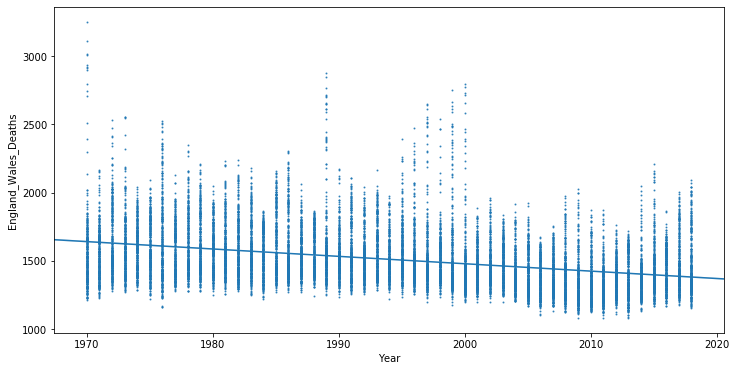

In [5]:
sns.regplot(x='Year', y='England_Wales_Deaths', data=d)

### 4. Explanatory Data Analysis

#### Preliminary Time Series Visualization

In [6]:
### Cleaning the data for time series analysis (remove all NaN values)
d = d["England_Wales_Deaths"].dropna()
d.head()
print(len(d))

17897


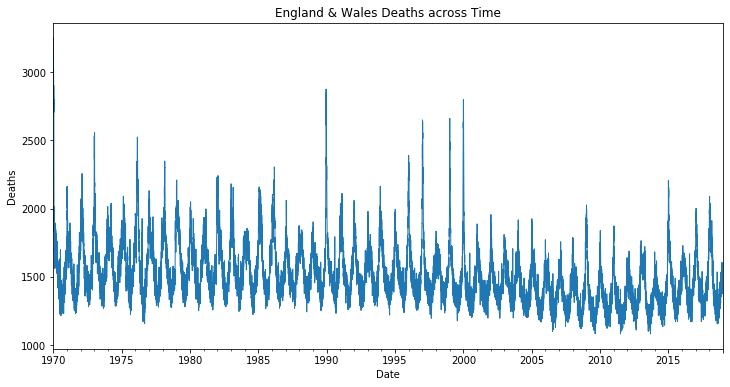

In [7]:
### Visualize time series
d.plot()
pl.ylabel("Deaths")
pl.title("England & Wales Deaths across Time")
pl.show()

### 5. Time Series Decomposition

#### Multiplicative Model (yearly, freq=365)

In [8]:
### Defining Parameters & Setting Up TS Decomposition Model
period1 = 365 #yearly freq

nr = d.shape[0] #number of rows
nb = 68 #nbest; nb > 68 can result in x labels overlapping
npr = min(nr, nb) #npractical; the normal number of obs plotted

#https://matplotlib.org/tutorials/introductory/customizing.html
pl.rcParams['figure.figsize'] = 8, 10
pl.rcParams['lines.linewidth'] = 1
pl.rcParams['lines.markersize'] = 1


Time Series Decomposition (Multiplicative) for 17897 observations:


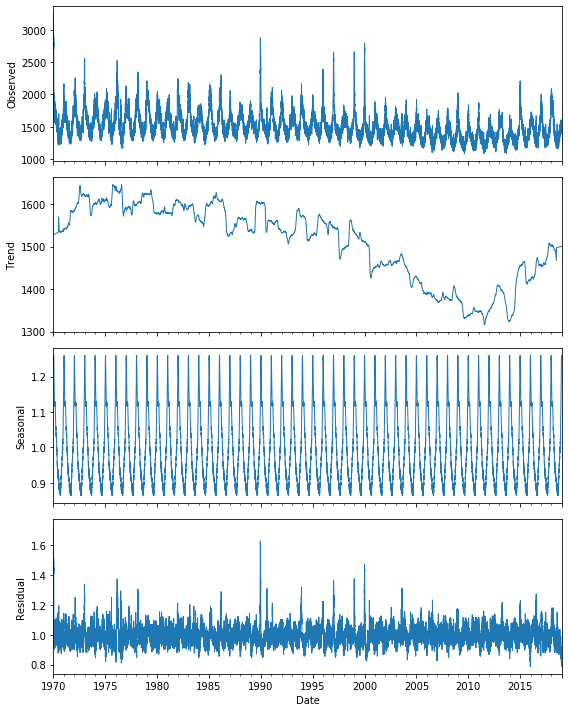

In [9]:
### Initial plot for full period TS decomposition
if 'mf4' in vars() or 'mf4' in globals() or 'mf4' in vars(__builtins__):
    del mf4 #delete d if defined during previous run
mf4 = seasonal_decompose(d, model='mul', freq=period1, extrapolate_trend='freq') #'extrapolate' removes NaN in 'trend'

print('\nTime Series Decomposition (Multiplicative) for', nr, 'observations:')

mf4.plot()
pl.show()

In [10]:
# Save a copy of the decomposed components 
mf4obs = mf4.observed.copy()
mf4trend = mf4.trend.copy()
mf4season = mf4.seasonal.copy()

##### Viewing Last 365 Data Points

Last 365 observations:


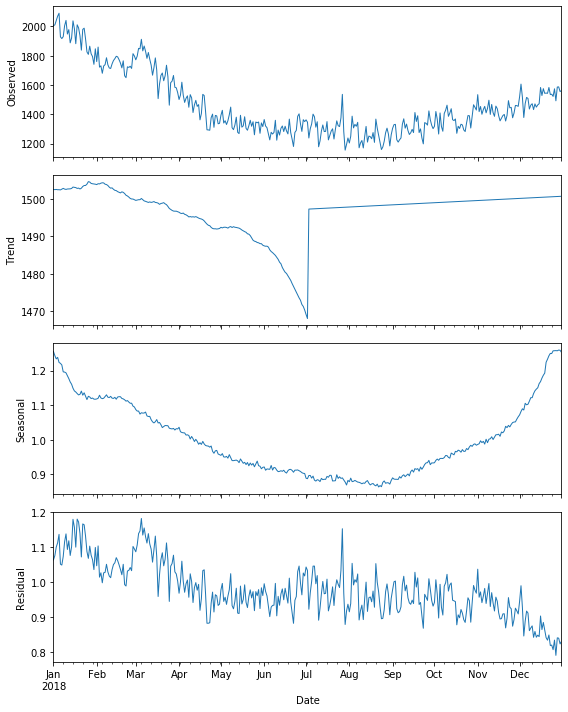

In [11]:
t = 365 #tail
if len(mf4.observed) > t:
    
    mf4.observed = mf4.observed[-t:]
    mf4.trend = mf4.trend[-t:]
    mf4.seasonal = mf4.seasonal[-t:]
    mf4.resid = mf4.resid[-t:]
    
    ### >>> Use this code below if the above code doesn't work <<<
    #mf4._observed = mf4._observed[-t:]
    #mf4._trend = mf4._trend[-t:]
    #mf4._seasonal = mf4._seasonal[-t:]
    #mf4._resid = mf4._resid[-t:]
    
    #pl.xticks(rotation=90)
    print('Last', t, 'observations:')
    mf4.plot()
    pl.show()

##### Viewing Last 60 Data Points

Last 60 observations:


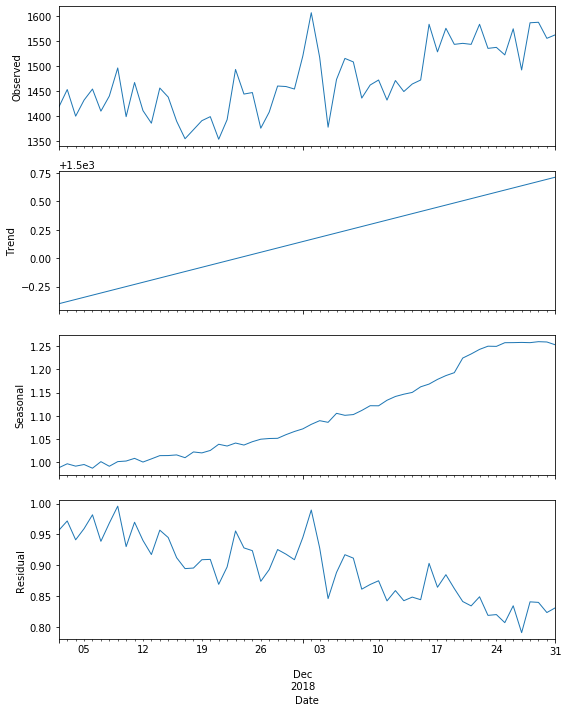

In [12]:
t = 60 #tail
if len(mf4.observed) > t:
    
    mf4.observed = mf4.observed[-t:]
    mf4.trend = mf4.trend[-t:]
    mf4.seasonal = mf4.seasonal[-t:]
    mf4.resid = mf4.resid[-t:]
    
    ### >>> Use this code below if the above code doesn't work <<<
    #mf4._observed = mf4._observed[-t:]
    #mf4._trend = mf4._trend[-t:]
    #mf4._seasonal = mf4._seasonal[-t:]
    #mf4._resid = mf4._resid[-t:]
    
    #pl.xticks(rotation=90)
    print('Last', t, 'observations:')
    mf4.plot()
    pl.show()

#### Multiplicative Model (monthly, freq=30)


Time Series Decomposition (Multiplicative) for 17897 observations:


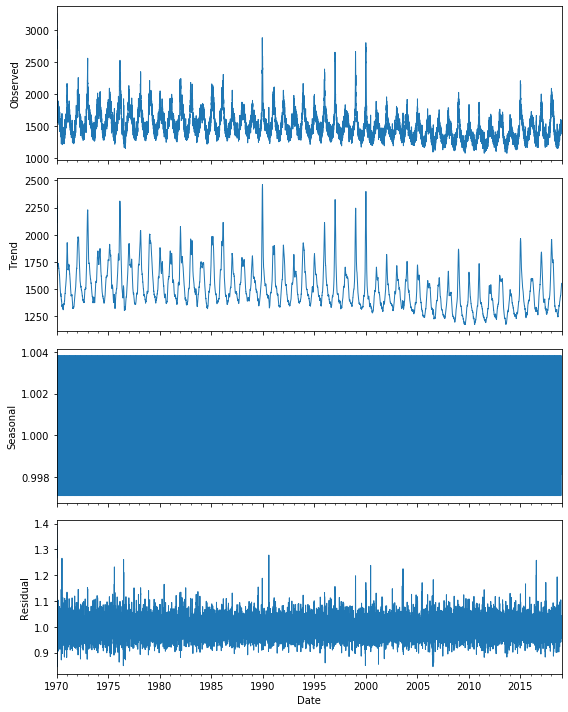

In [13]:
pl.rcParams['figure.figsize'] = 8, 10

period1 = 30 #monthly freq

mf4 = seasonal_decompose(d, model='mul', freq=period1, extrapolate_trend='freq') #'extrapolate' removes NaN in 'trend'

print('\nTime Series Decomposition (Multiplicative) for', nr, 'observations:')

mf4.plot()
pl.show()

##### Viewing Last 365 Data Points

Last 365 observations:


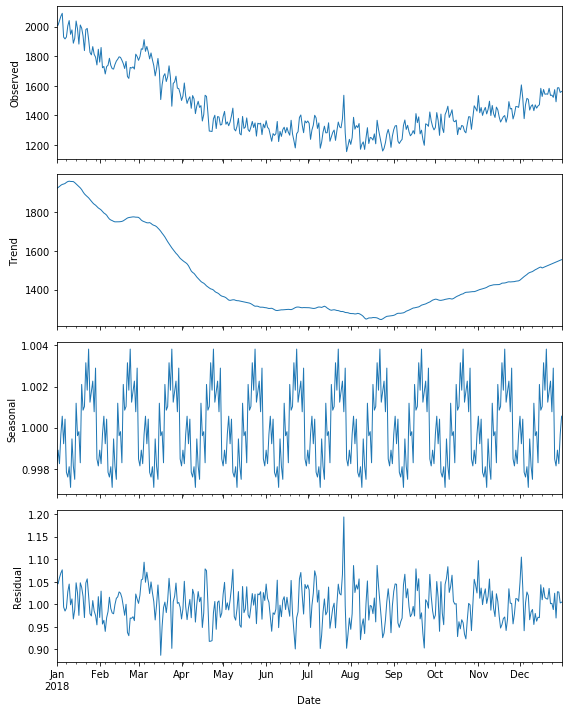

In [14]:
t = 365 #tail
if len(mf4.observed) > t:
    
    mf4.observed = mf4.observed[-t:]
    mf4.trend = mf4.trend[-t:]
    mf4.seasonal = mf4.seasonal[-t:]
    mf4.resid = mf4.resid[-t:]
    
    ### >>> Use this code below if the above code doesn't work <<<
    #mf4._observed = mf4._observed[-t:]
    #mf4._trend = mf4._trend[-t:]
    #mf4._seasonal = mf4._seasonal[-t:]
    #mf4._resid = mf4._resid[-t:]
    
    #pl.xticks(rotation=90)
    print('Last', t, 'observations:')
    mf4.plot()
    pl.show()

##### Viewing Last 60 Data Points

Last 60 observations:


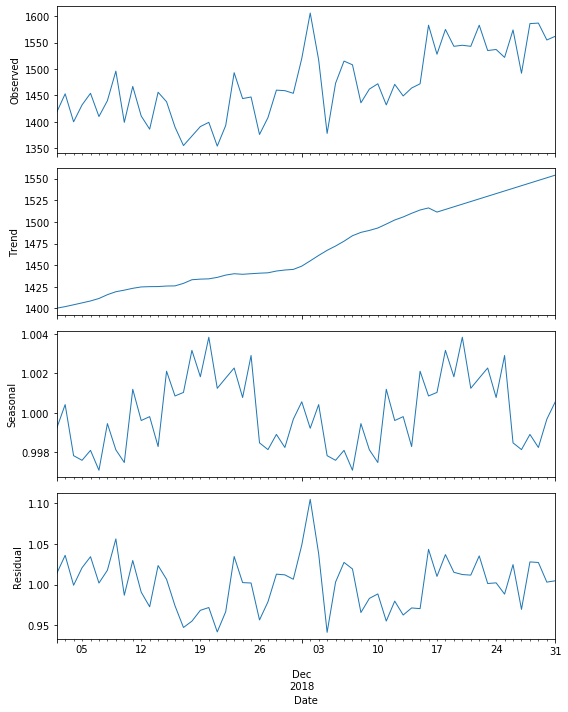

In [15]:
t = 60 #tail
if len(mf4.observed) > t:
    
    mf4.observed = mf4.observed[-t:]
    mf4.trend = mf4.trend[-t:]
    mf4.seasonal = mf4.seasonal[-t:]
    mf4.resid = mf4.resid[-t:]
    
    ### >>> Use this code below if the above code doesn't work <<<
    #mf4._observed = mf4._observed[-t:]
    #mf4._trend = mf4._trend[-t:]
    #mf4._seasonal = mf4._seasonal[-t:]
    #mf4._resid = mf4._resid[-t:]
    
    #pl.xticks(rotation=90)
    print('Last', t, 'observations:')
    mf4.plot()
    pl.show()

#### Multiplicative Model (weekly, freq=7)


Time Series Decomposition (Multiplicative) for 17897 observations:


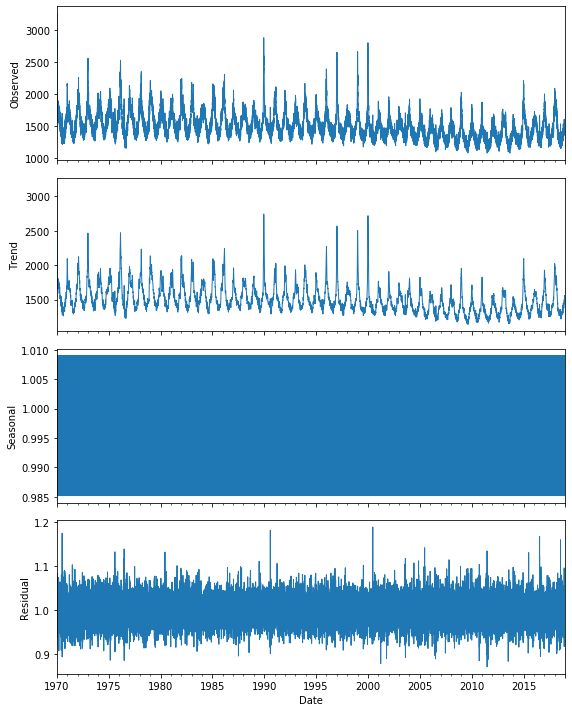

In [16]:
pl.rcParams['figure.figsize'] = 8, 10

period1 = 7 #weekly freq

mf4 = seasonal_decompose(d, model='mul', freq=period1, extrapolate_trend='freq') #'extrapolate' removes NaN in 'trend'

print('\nTime Series Decomposition (Multiplicative) for', nr, 'observations:')

mf4.plot()
pl.show()

##### Viewing Last 365 Data Points

Last 365 observations:


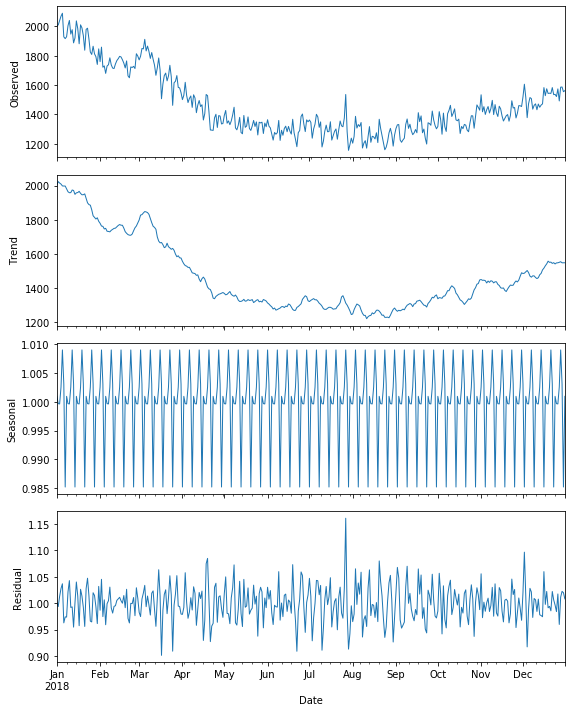

In [17]:
t = 365 #tail
if len(mf4.observed) > t:
    
    mf4.observed = mf4.observed[-t:]
    mf4.trend = mf4.trend[-t:]
    mf4.seasonal = mf4.seasonal[-t:]
    mf4.resid = mf4.resid[-t:]
    
    ### >>> Use this code below if the above code doesn't work <<<
    #mf4._observed = mf4._observed[-t:]
    #mf4._trend = mf4._trend[-t:]
    #mf4._seasonal = mf4._seasonal[-t:]
    #mf4._resid = mf4._resid[-t:]
    
    #pl.xticks(rotation=90)
    print('Last', t, 'observations:')
    mf4.plot()
    pl.show()

##### Viewing Last 60 Data Points

Last 60 observations:


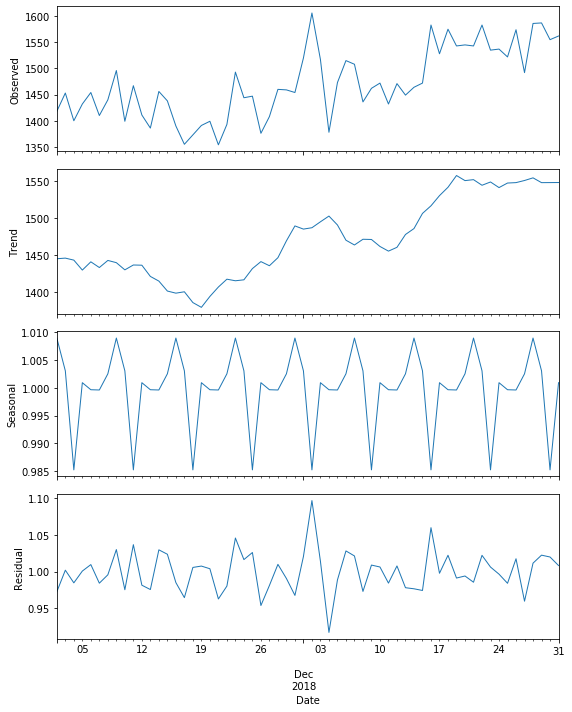

In [18]:
t = 60 #tail
if len(mf4.observed) > t:
    
    mf4.observed = mf4.observed[-t:]
    mf4.trend = mf4.trend[-t:]
    mf4.seasonal = mf4.seasonal[-t:]
    mf4.resid = mf4.resid[-t:]
    
    ### >>> Use this code below if the above code doesn't work <<<
    #mf4._observed = mf4._observed[-t:]
    #mf4._trend = mf4._trend[-t:]
    #mf4._seasonal = mf4._seasonal[-t:]
    #mf4._resid = mf4._resid[-t:]
    
    #pl.xticks(rotation=90)
    print('Last', t, 'observations:')
    mf4.plot()
    pl.show()

### 6. Exponential Smoothing, Holt's & Winter's Models

In [19]:
from statsmodels.tsa.api import ExponentialSmoothing, Holt
from sklearn.metrics import mean_squared_error

#single, double or triple exponential smoothing:
if 'md' in vars() or 'md' in globals() or 'md' in vars(__builtins__):
    del md #delete d if defined during previous run

period1 = 7 #weekly cycle, 7 periods in a weekly season (roughly)
freq1 = pd.infer_freq(d.index, warn=False)
nr = d.shape[0] #number of rows
nb = 68 #nbest; nb > 68 can result in x labels overlapping
npr = min(nr, nb) #npractical; the normal number of obs plotted
rmse_all = {'1 Week (8 days)':[], '1 Month':[], '1 Year':[], 'All':[]}

pl.rcParams['figure.figsize'] = 8, 10


#### All Values


Simple Exponential Fit:

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                17897
Model:             ExponentialSmoothing   SSE                       64381547.167
Optimized:                         True   AIC                         146543.727
Trend:                             None   BIC                         146559.312
Seasonal:                          None   AICC                        146543.730
Seasonal Periods:                  None   Date:                 Wed, 11 Mar 2020
Box-Cox:                          False   Time:                         23:28:12
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.4899489                alpha                 True
initial_

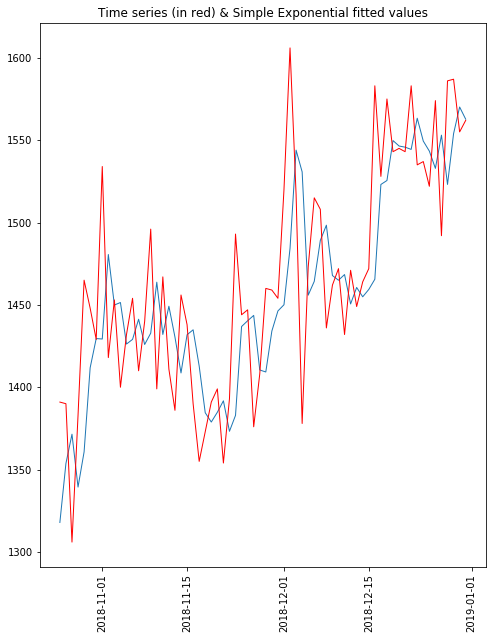


Last 7 observations:


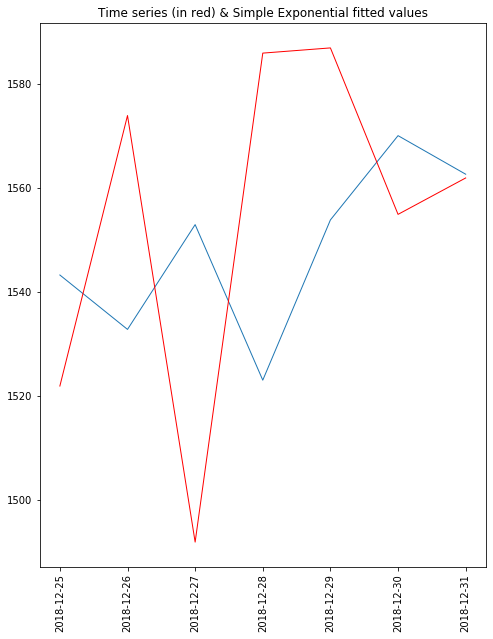


Simple Exponential Forecasts for 7 periods:
2019-01-01    1562.366733
2019-01-02    1562.366733
2019-01-03    1562.366733
2019-01-04    1562.366733
2019-01-05    1562.366733
2019-01-06    1562.366733
2019-01-07    1562.366733
Freq: D, dtype: float64


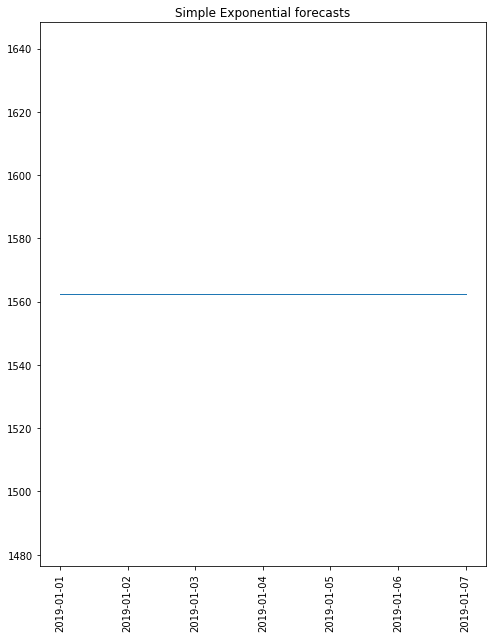


Holt's Double Exponential Fit:

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                17897
Model:             ExponentialSmoothing   SSE                       64381576.883
Optimized:                         True   AIC                         146547.736
Trend:                         Additive   BIC                         146578.905
Seasonal:                          None   AICC                        146547.740
Seasonal Periods:                  None   Date:                 Wed, 11 Mar 2020
Box-Cox:                          False   Time:                         23:28:13
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.4899332                alpha                 True
s

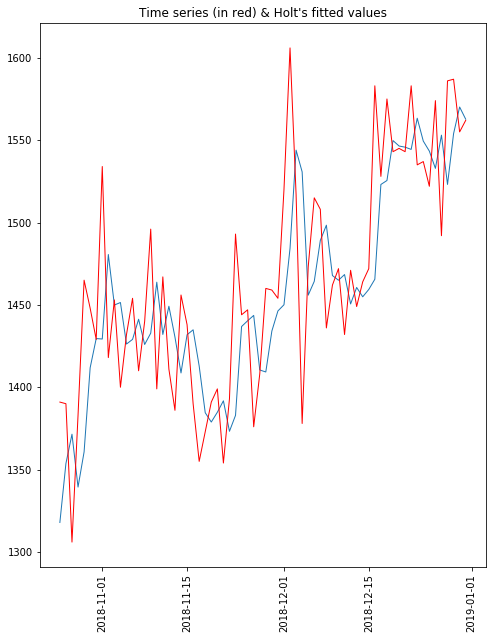


Last 7 observations:


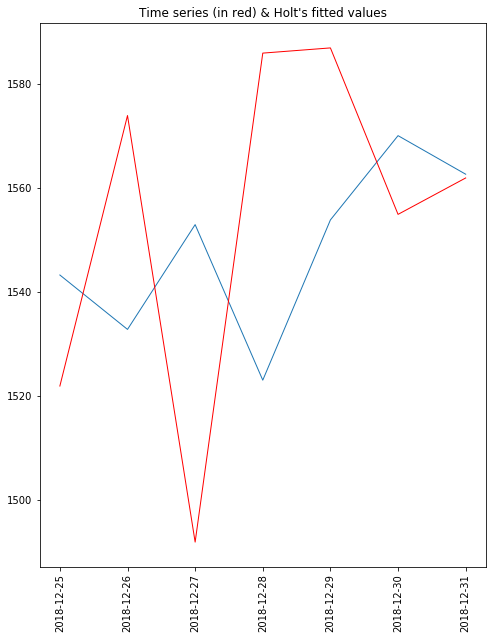


Holt's Forecasts for 7 periods:
2019-01-01    1562.366651
2019-01-02    1562.366651
2019-01-03    1562.366651
2019-01-04    1562.366651
2019-01-05    1562.366651
2019-01-06    1562.366651
2019-01-07    1562.366651
Freq: D, dtype: float64


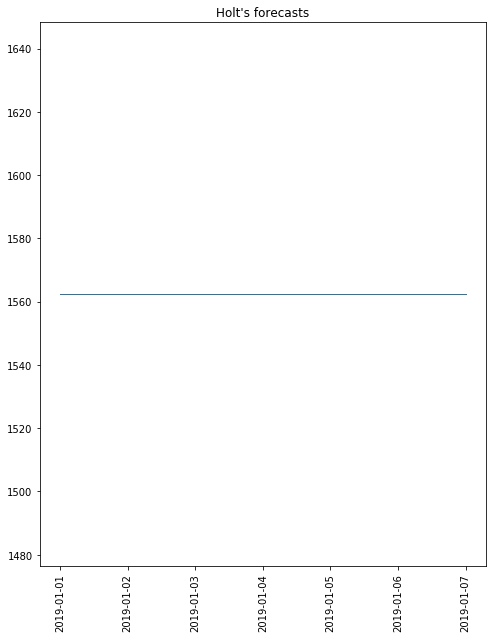


Winters' Triple Exponential Fit:

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                17897
Model:             ExponentialSmoothing   SSE                       61389783.522
Optimized:                         True   AIC                         145710.123
Trend:                         Additive   BIC                         145795.840
Seasonal:                Multiplicative   AICC                        145710.144
Seasonal Periods:                     7   Date:                 Wed, 11 Mar 2020
Box-Cox:                          False   Time:                         23:28:16
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.5022391                alpha            

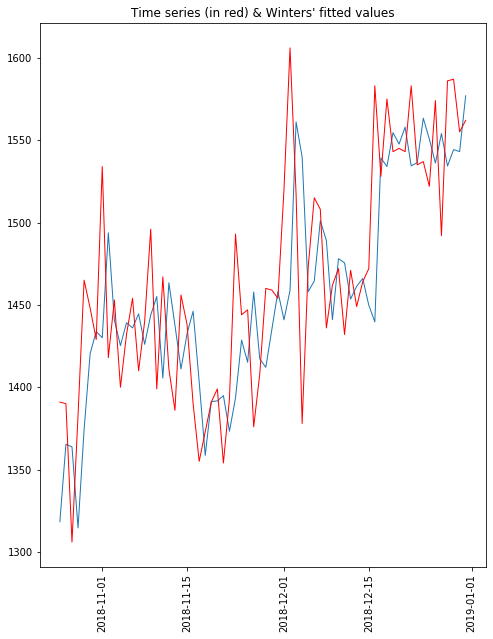


Last 7 observations:


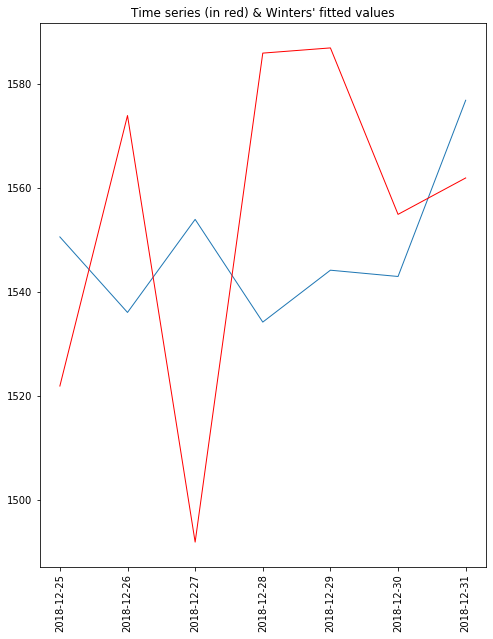


Winters' Forecasts for 7 periods:
2019-01-01    1569.987425
2019-01-02    1569.986023
2019-01-03    1568.668882
2019-01-04    1580.634517
2019-01-05    1564.415493
2019-01-06    1541.709099
2019-01-07    1569.434668
Freq: D, dtype: float64


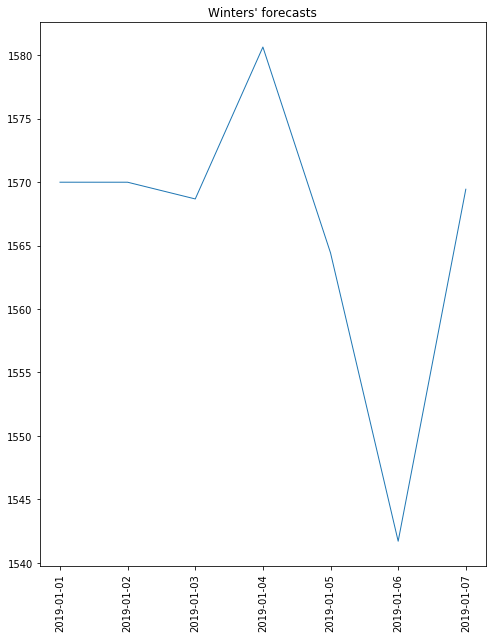


Multiplicative Holt's Double Exponential Fit:

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                17897
Model:             ExponentialSmoothing   SSE                       64375244.553
Optimized:                         True   AIC                         146545.975
Trend:                   Multiplicative   BIC                         146577.145
Seasonal:                          None   AICC                        146545.980
Seasonal Periods:                  None   Date:                 Wed, 11 Mar 2020
Box-Cox:                          False   Time:                         23:28:17
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.4906201                alpha        

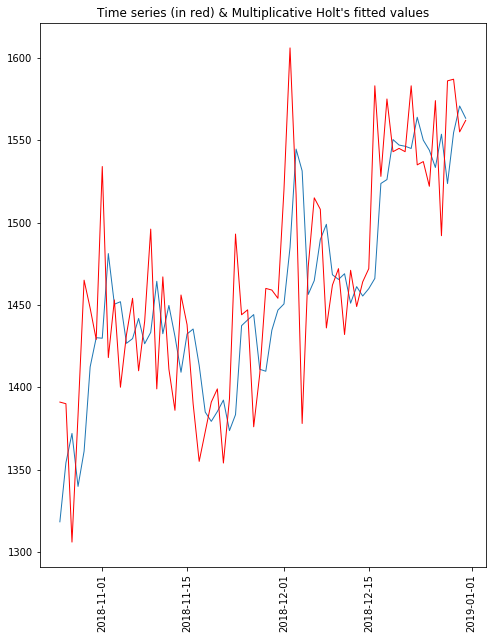


Last 7 observations:


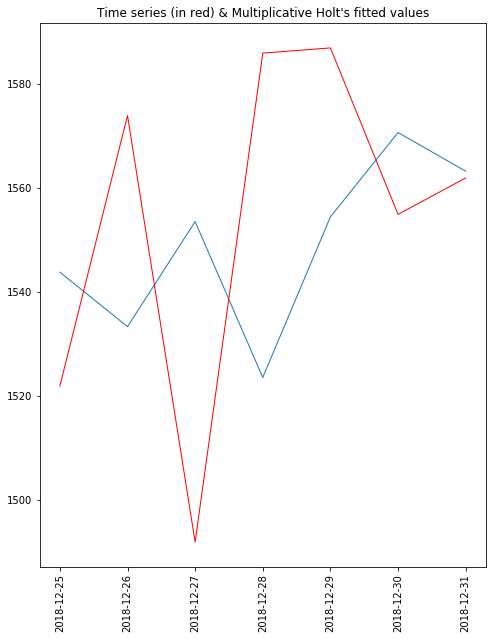


Multiplicative Holt's Forecasts for 7 periods:
2019-01-01    1562.941231
2019-01-02    1563.221869
2019-01-03    1563.502559
2019-01-04    1563.783298
2019-01-05    1564.064088
2019-01-06    1564.344928
2019-01-07    1564.625819
Freq: D, dtype: float64


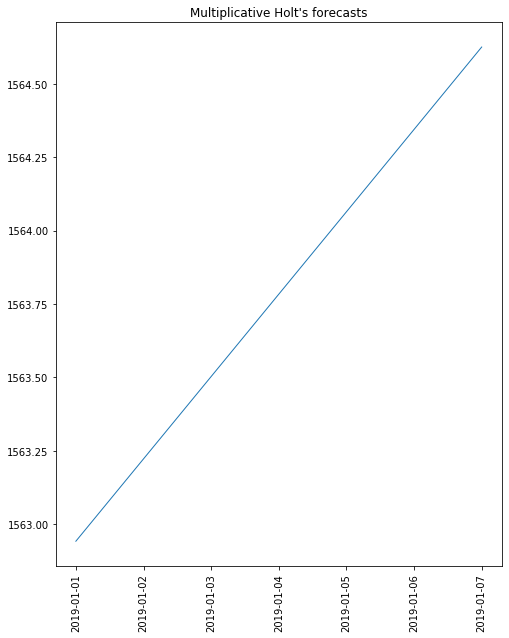

In [20]:
### Full fitted values
for i in range(1,4):
    if i == 1:
        #Simple Exponential:
        md = ExponentialSmoothing(d.astype('double'), freq=freq1, seasonal_periods=period1, missing='raise')
        mtd = 'Simple Exponential'
    elif i == 2:
        #Holt's:
        md = ExponentialSmoothing(d.astype('double'), trend='add', freq=freq1, seasonal_periods=period1)
        #md = Holt(d.astype('double'))
        mtd = "Holt's"
    else:
        #Winters':
        try:
            md = ExponentialSmoothing(d.astype('double'), trend='add', seasonal='mul', freq=freq1, seasonal_periods=period1)
        except:
            #necesary for Azure server; changing to default seasonal='add', which means Holt's instead of Winters':
            md = ExponentialSmoothing(d.astype('double'), trend='add', freq=freq1, seasonal_periods=period1)
            print("To get around a crash, done Holt's instead of Winters'.")
        mtd = "Winters'"

    mf = md.fit()
    
    rmse = round(np.sqrt(mean_squared_error(d, mf.fittedvalues)),3) # assumes all years are 365 days
    rmse_all['All'].append(rmse)
    
    if i == 1:
        print("\nSimple Exponential Fit:\n")
    elif i == 2:
        print("\nHolt's Double Exponential Fit:\n")
    else:
        print("\nWinters' Triple Exponential Fit:\n")

    print(mf.summary()) #no output on Azure server; only shows 'None'
    #print(np.array(list(mf.params.items())))
    print('\nLast', npr, 'observations:')
    pl.plot(mf.fittedvalues[-npr:])
    pl.plot(d[-npr:], color='red')
    pl.xticks(rotation=90)
    pl.title('Time series (in red) & '+('Simple Exponential' if i==1 else ("Holt's" if i==2 else "Winters'"))+' fitted values')
    pl.show()
    
    if nr > period1:
        print('\nLast', period1, 'observations:')
        pl.plot(mf.fittedvalues[-period1:])
        pl.plot(d[-period1:], color='red')
        pl.xticks(rotation=90)
        pl.title('Time series (in red) & '+('Simple Exponential' if i==1 else ("Holt's" if i==2 else "Winters'"))+' fitted values')
        pl.show()
    
    print('\n'+mtd, 'Forecasts for', period1, 'periods:')
    #forecast a full cycle:
    #prd = mf.predict(start=d.shape[0], end=dt.shape[0]+period1-1)
    prd = mf.forecast(period1) #same as above
    print(prd)
    pl.xticks(rotation=90)
    pl.plot(prd)
    pl.title(('Simple Exponential' if i==1 else ("Holt's" if i==2 else "Winters'"))+' forecasts')
    pl.show()

if 'mf2' in vars() or 'mf2' in globals() or 'mf2' in vars(__builtins__):
    del mf2 #delete d if defined during previous run
    
#alternate Holt's, giving same results as earlier 'Double Exponential':
try:
    #mf2 = Holt(d.astype('double')).fit()
    mf2 = ExponentialSmoothing(d.astype('double'), trend='mul', freq=freq1, seasonal_periods=period1).fit()
except:
    #necesary for Azure server; changing to default trend='add', yielding same results as above Holt's:
    mf2 = ExponentialSmoothing(d.astype('double'), freq=freq1, seasonal_periods=period1).fit()
    print("To get around a crash, done additive instead of multiplicative Holt's.")
    
print("\nMultiplicative Holt's Double Exponential Fit:\n")
#print(mf2.params.items())
print(mf2.summary())

rmse = round(np.sqrt(mean_squared_error(d, mf2.fittedvalues)),3) # assumes all years are 365 days
rmse_all['All'].append(rmse)

print('\nLast', npr, 'observations:')
pl.plot(mf2.fittedvalues[-npr:])
pl.plot(d[-npr:], color='red')
pl.xticks(rotation=90)
pl.title("Time series (in red) & Multiplicative Holt's fitted values")
pl.show()

if nr > period1:
    print('\nLast', period1, 'observations:')
    pl.plot(mf2.fittedvalues[-period1:])
    pl.plot(d[-period1:], color='red')
    pl.xticks(rotation=90)
    pl.title("Time series (in red) & Multiplicative Holt's fitted values")
    pl.show()

print("\nMultiplicative Holt's Forecasts for", period1, "periods:")
prd = mf2.forecast(period1)
print(prd)
pl.xticks(rotation=90)
pl.plot(prd)
pl.title("Multiplicative Holt's forecasts")
pl.show()

#### 1 Year Values (365 Data Points)


Simple Exponential Fit:

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  365
Model:             ExponentialSmoothing   SSE                        1326516.149
Optimized:                         True   AIC                           2996.332
Trend:                             None   BIC                           3004.132
Seasonal:                          None   AICC                          2996.443
Seasonal Periods:                  None   Date:                 Wed, 11 Mar 2020
Box-Cox:                          False   Time:                         23:28:19
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.3859428                alpha                 True
initial_

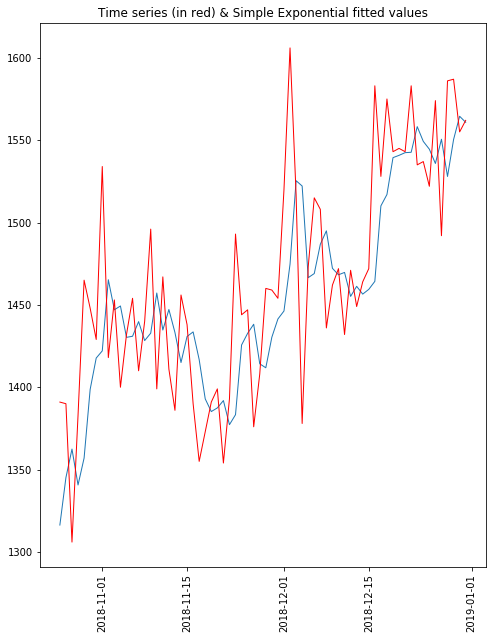


Last 7 observations:


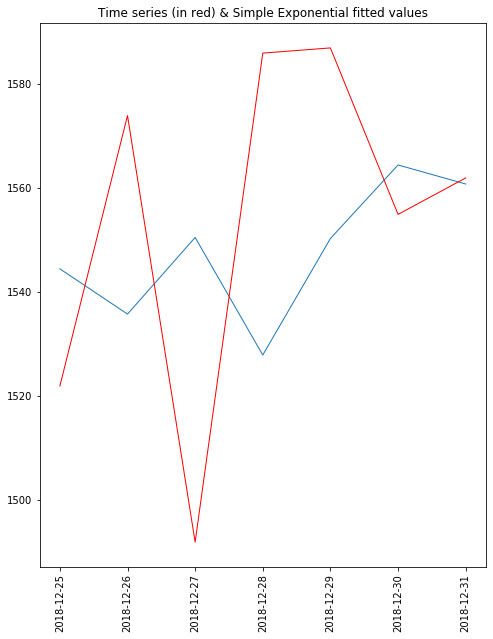


Simple Exponential Forecasts for 7 periods:
2019-01-01    1561.28423
2019-01-02    1561.28423
2019-01-03    1561.28423
2019-01-04    1561.28423
2019-01-05    1561.28423
2019-01-06    1561.28423
2019-01-07    1561.28423
Freq: D, dtype: float64


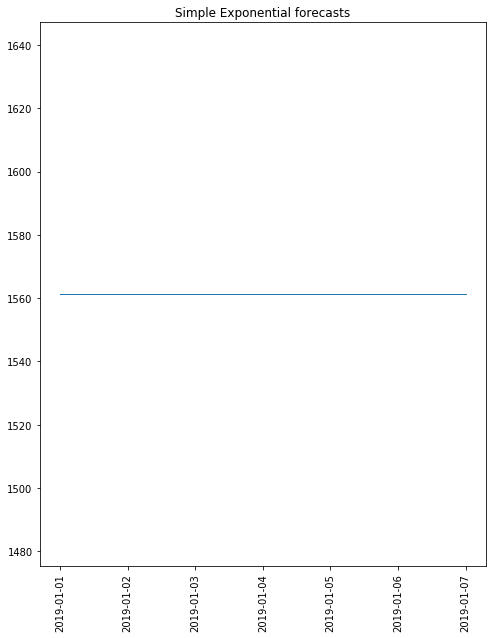


Holt's Double Exponential Fit:

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  365
Model:             ExponentialSmoothing   SSE                        1326513.027
Optimized:                         True   AIC                           3000.331
Trend:                         Additive   BIC                           3015.931
Seasonal:                          None   AICC                          3000.566
Seasonal Periods:                  None   Date:                 Wed, 11 Mar 2020
Box-Cox:                          False   Time:                         23:28:20
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.3857266                alpha                 True
s

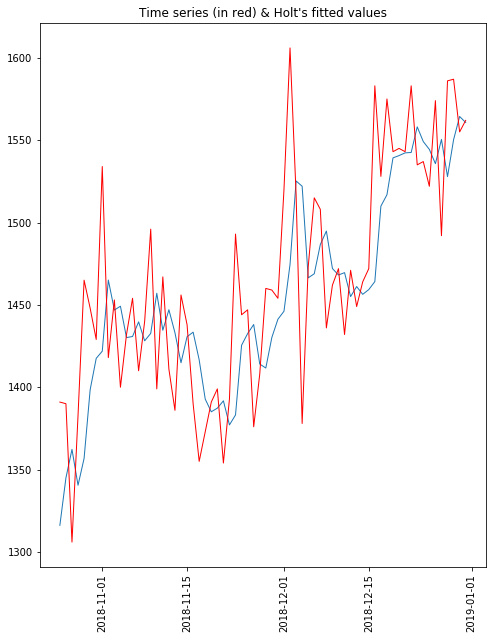


Last 7 observations:


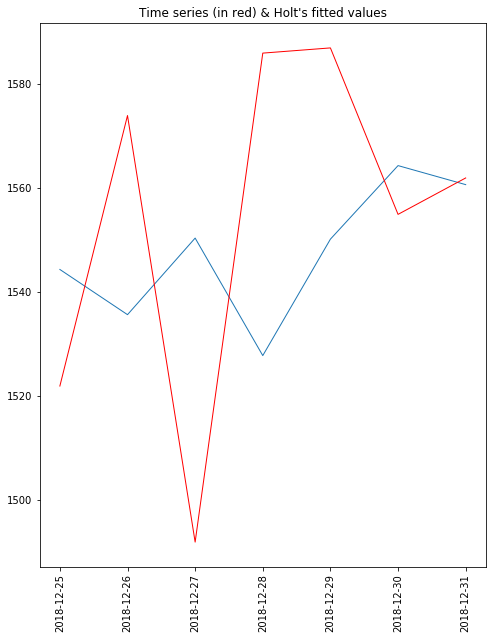


Holt's Forecasts for 7 periods:
2019-01-01    1561.168242
2019-01-02    1561.125246
2019-01-03    1561.082251
2019-01-04    1561.039255
2019-01-05    1560.996259
2019-01-06    1560.953263
2019-01-07    1560.910268
Freq: D, dtype: float64


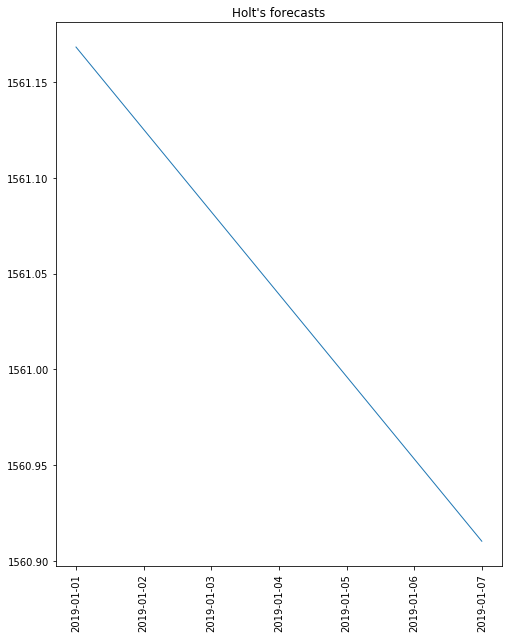


Winters' Triple Exponential Fit:

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  365
Model:             ExponentialSmoothing   SSE                        1268379.036
Optimized:                         True   AIC                           2997.974
Trend:                         Additive   BIC                           3040.873
Seasonal:                Multiplicative   AICC                          2999.011
Seasonal Periods:                     7   Date:                 Wed, 11 Mar 2020
Box-Cox:                          False   Time:                         23:28:21
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.4056180                alpha            

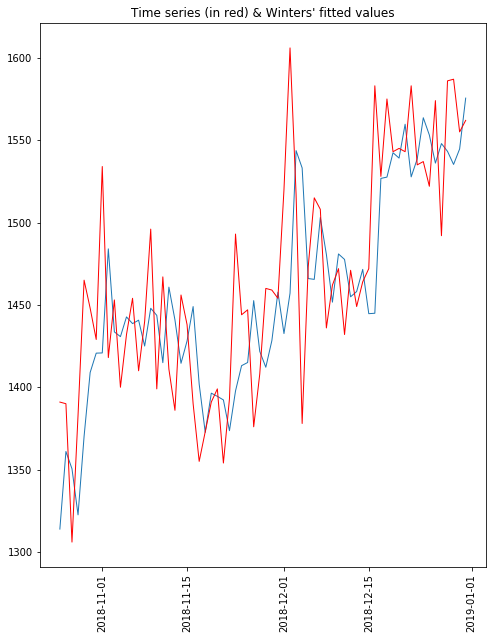


Last 7 observations:


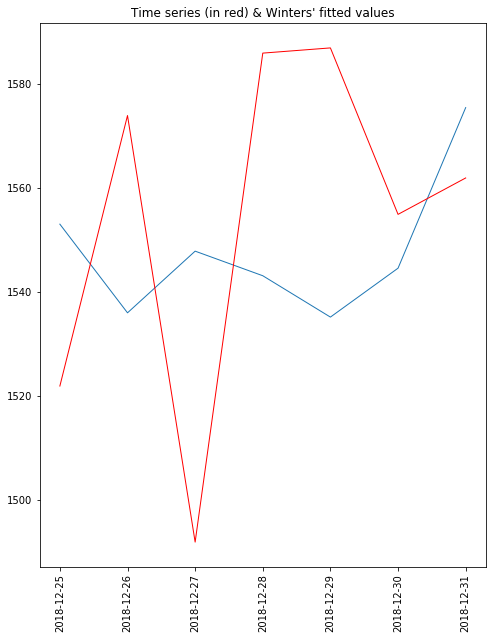


Winters' Forecasts for 7 periods:
2019-01-01    1570.345239
2019-01-02    1565.836699
2019-01-03    1562.275434
2019-01-04    1580.670748
2019-01-05    1555.035004
2019-01-06    1543.458389
2019-01-07    1570.039733
Freq: D, dtype: float64


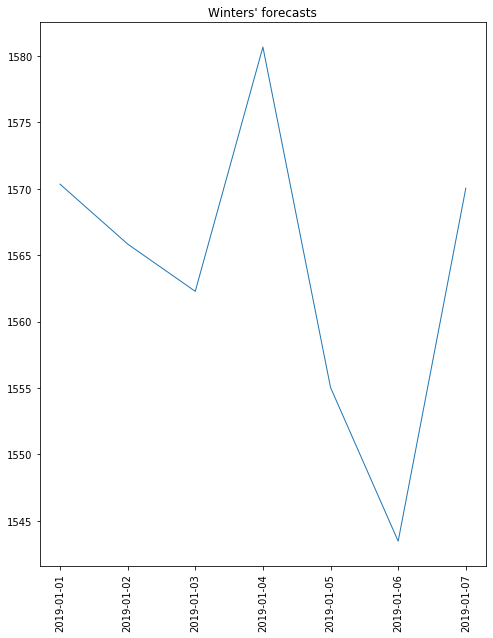


Multiplicative Holt's Double Exponential Fit:

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  365
Model:             ExponentialSmoothing   SSE                        1312107.688
Optimized:                         True   AIC                           2996.346
Trend:                   Multiplicative   BIC                           3011.945
Seasonal:                          None   AICC                          2996.580
Seasonal Periods:                  None   Date:                 Wed, 11 Mar 2020
Box-Cox:                          False   Time:                         23:28:21
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.3369321                alpha        

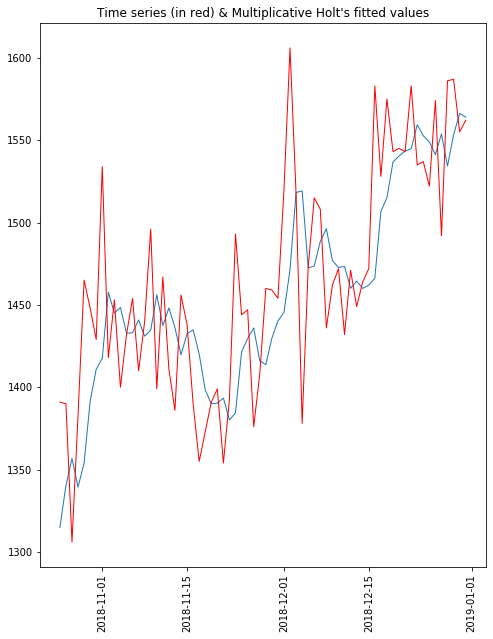


Last 7 observations:


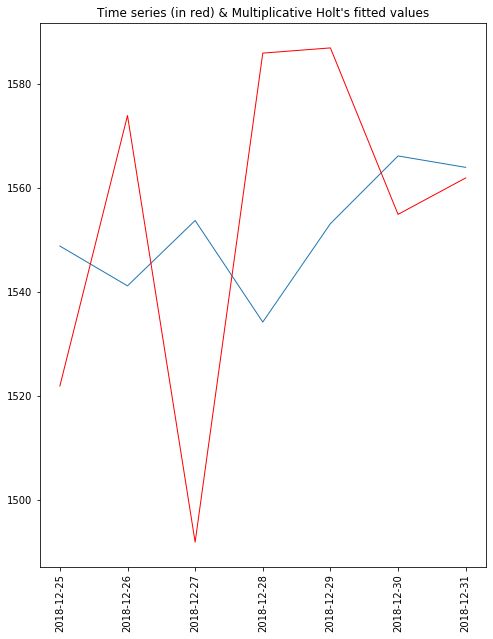


Multiplicative Holt's Forecasts for 7 periods:
2019-01-01    1564.932681
2019-01-02    1566.517109
2019-01-03    1568.103142
2019-01-04    1569.690780
2019-01-05    1571.280026
2019-01-06    1572.870881
2019-01-07    1574.463346
Freq: D, dtype: float64


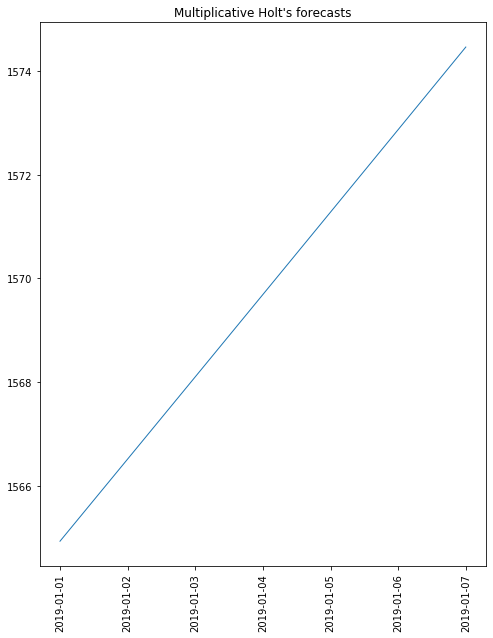

In [21]:
### 1-year fitted values
d0 = d.copy()
d0 = d0[-365:]

for i in range(1,4):
    if i == 1:
        #Simple Exponential:
        md = ExponentialSmoothing(d0.astype('double'), freq=freq1, seasonal_periods=period1, missing='raise')
        mtd = 'Simple Exponential'
    elif i == 2:
        #Holt's:
        md = ExponentialSmoothing(d0.astype('double'), trend='add', freq=freq1, seasonal_periods=period1)
        #md = Holt(d0.astype('double'))
        mtd = "Holt's"
    else:
        #Winters':
        try:
            md = ExponentialSmoothing(d0.astype('double'), trend='add', seasonal='mul', freq=freq1, seasonal_periods=period1)
        except:
            #necesary for Azure server; changing to default seasonal='add', which means Holt's instead of Winters':
            md = ExponentialSmoothing(d0.astype('double'), trend='add', freq=freq1, seasonal_periods=period1)
            print("To get around a crash, done Holt's instead of Winters'.")
        mtd = "Winters'"

    mf = md.fit()
        
    rmse = round(np.sqrt(mean_squared_error(d0, mf.fittedvalues)),3) # assumes all years are 365 days
    rmse_all['1 Year'].append(rmse)
    
    if i == 1:
        print("\nSimple Exponential Fit:\n")
    elif i == 2:
        print("\nHolt's Double Exponential Fit:\n")
    else:
        print("\nWinters' Triple Exponential Fit:\n")

    print(mf.summary()) #no output on Azure server; only shows 'None'
    #print(np.array(list(mf.params.items())))
    print('\nLast', npr, 'observations:')
    pl.plot(mf.fittedvalues[-npr:])
    pl.plot(d0[-npr:], color='red')
    pl.xticks(rotation=90)
    pl.title('Time series (in red) & '+('Simple Exponential' if i==1 else ("Holt's" if i==2 else "Winters'"))+' fitted values')
    pl.show()
    
    if nr > period1:
        print('\nLast', period1, 'observations:')
        pl.plot(mf.fittedvalues[-period1:])
        pl.plot(d0[-period1:], color='red')
        pl.xticks(rotation=90)
        pl.title('Time series (in red) & '+('Simple Exponential' if i==1 else ("Holt's" if i==2 else "Winters'"))+' fitted values')
        pl.show()
    
    print('\n'+mtd, 'Forecasts for', period1, 'periods:')
    #forecast a full cycle:
    #prd = mf.predict(start=d0.shape[0], end=d0.shape[0]+period1-1)
    prd = mf.forecast(period1) #same as above
    print(prd)
    pl.xticks(rotation=90)
    pl.plot(prd)
    pl.title(('Simple Exponential' if i==1 else ("Holt's" if i==2 else "Winters'"))+' forecasts')
    pl.show()

if 'mf2' in vars() or 'mf2' in globals() or 'mf2' in vars(__builtins__):
    del mf2 #delete d0 if defined during previous run
    
#alternate Holt's, giving same results as earlier 'Double Exponential':
try:
    #mf2 = Holt(d0.astype('double')).fit()
    mf2 = ExponentialSmoothing(d0.astype('double'), trend='mul', freq=freq1, seasonal_periods=period1).fit()
except:
    #necesary for Azure server; changing to default trend='add', yielding same results as above Holt's:
    mf2 = ExponentialSmoothing(d0.astype('double'), freq=freq1, seasonal_periods=period1).fit()
    print("To get around a crash, done additive instead of multiplicative Holt's.")
    
print("\nMultiplicative Holt's Double Exponential Fit:\n")
#print(mf2.params.items())
print(mf2.summary())

rmse = round(np.sqrt(mean_squared_error(d0, mf2.fittedvalues)),3) # assumes all years are 365 days
rmse_all['1 Year'].append(rmse)

print('\nLast', npr, 'observations:')
pl.plot(mf2.fittedvalues[-npr:])
pl.plot(d0[-npr:], color='red')
pl.xticks(rotation=90)
pl.title("Time series (in red) & Multiplicative Holt's fitted values")
pl.show()

if nr > period1:
    print('\nLast', period1, 'observations:')
    pl.plot(mf2.fittedvalues[-period1:])
    pl.plot(d0[-period1:], color='red')
    pl.xticks(rotation=90)
    pl.title("Time series (in red) & Multiplicative Holt's fitted values")
    pl.show()

print("\nMultiplicative Holt's Forecasts for", period1, "periods:")
prd = mf2.forecast(period1)
print(prd)
pl.xticks(rotation=90)
pl.plot(prd)
pl.title("Multiplicative Holt's forecasts")
pl.show()

#### 1-Month Values (30 Data Points)


Simple Exponential Fit:

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   30
Model:             ExponentialSmoothing   SSE                          72693.484
Optimized:                         True   AIC                            237.784
Trend:                             None   BIC                            240.587
Seasonal:                          None   AICC                           239.384
Seasonal Periods:                  None   Date:                 Wed, 11 Mar 2020
Box-Cox:                          False   Time:                         23:28:22
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.3392917                alpha                 True
initial_

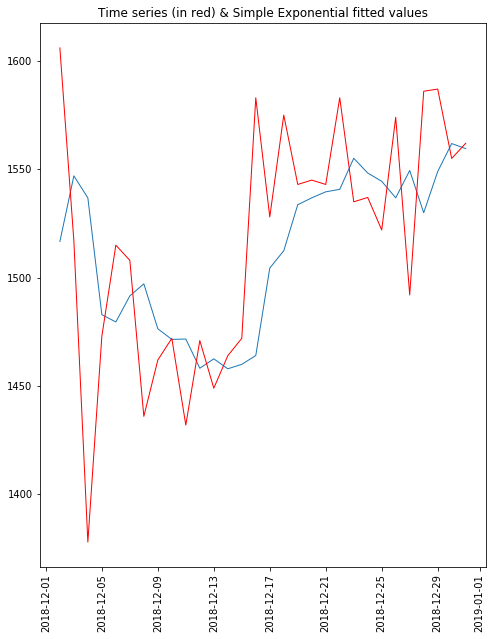


Last 7 observations:


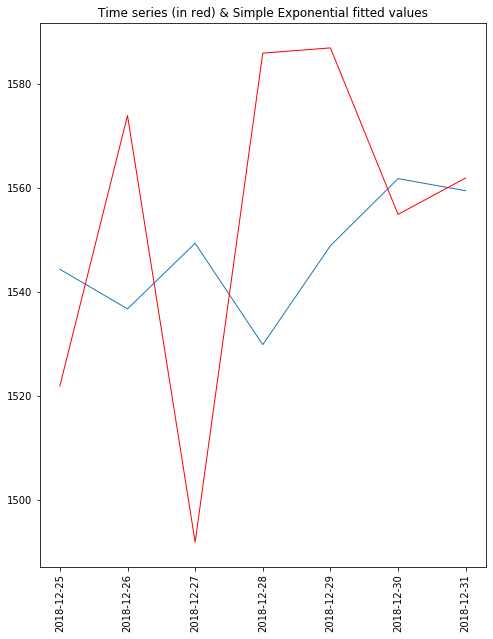


Simple Exponential Forecasts for 7 periods:
2019-01-01    1560.375175
2019-01-02    1560.375175
2019-01-03    1560.375175
2019-01-04    1560.375175
2019-01-05    1560.375175
2019-01-06    1560.375175
2019-01-07    1560.375175
Freq: D, dtype: float64


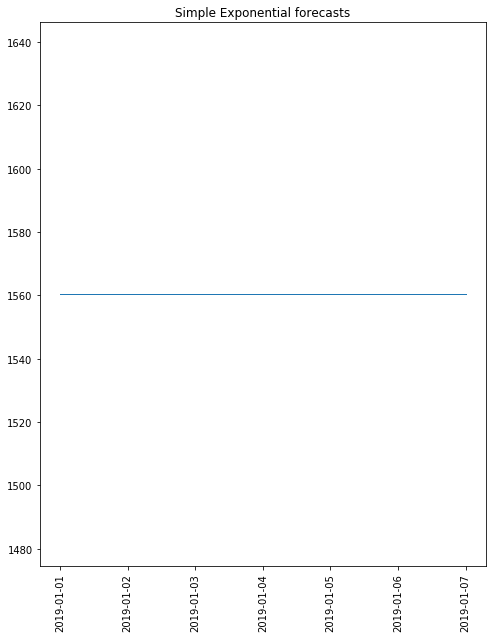


Holt's Double Exponential Fit:

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   30
Model:             ExponentialSmoothing   SSE                          65442.799
Optimized:                         True   AIC                            238.632
Trend:                         Additive   BIC                            244.237
Seasonal:                          None   AICC                           242.284
Seasonal Periods:                  None   Date:                 Wed, 11 Mar 2020
Box-Cox:                          False   Time:                         23:28:23
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level           8.0078e-09                alpha                 True
s

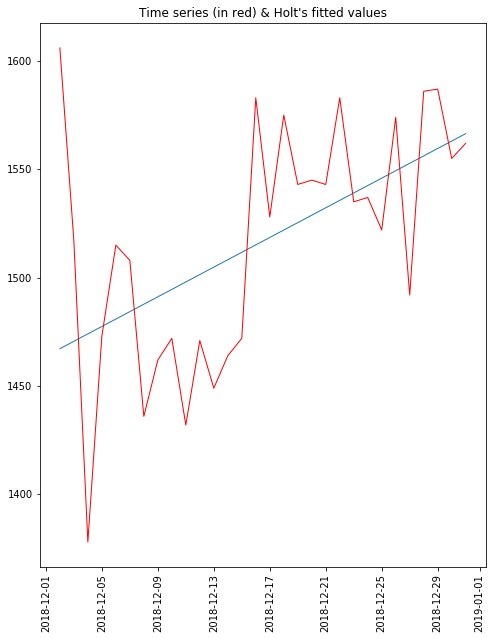


Last 7 observations:


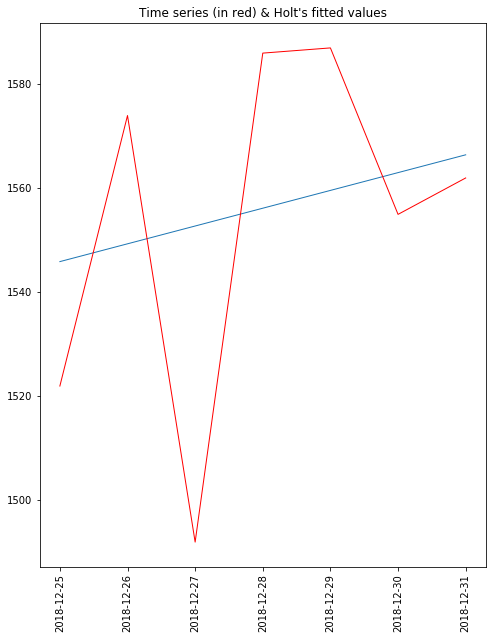


Holt's Forecasts for 7 periods:
2019-01-01    1569.871240
2019-01-02    1573.293040
2019-01-03    1576.714841
2019-01-04    1580.136641
2019-01-05    1583.558441
2019-01-06    1586.980242
2019-01-07    1590.402042
Freq: D, dtype: float64


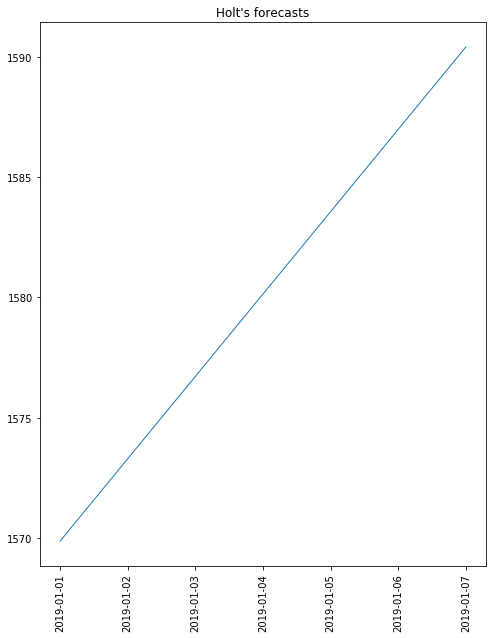


Winters' Triple Exponential Fit:

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   30
Model:             ExponentialSmoothing   SSE                          57876.718
Optimized:                         True   AIC                            248.946
Trend:                         Additive   BIC                            264.359
Seasonal:                Multiplicative   AICC                           271.696
Seasonal Periods:                     7   Date:                 Wed, 11 Mar 2020
Box-Cox:                          False   Time:                         23:28:24
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.3345218                alpha            

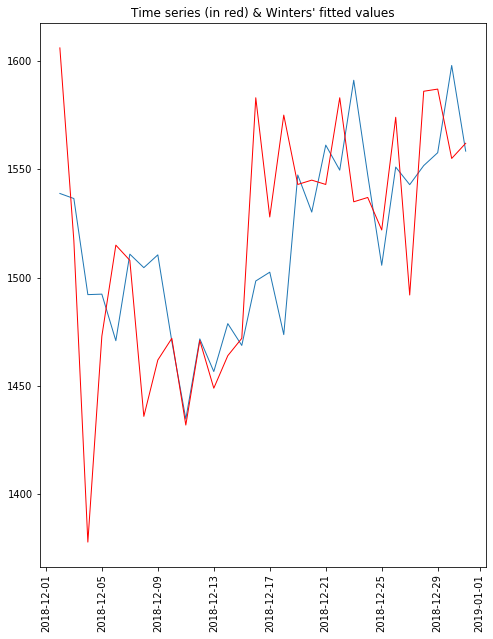


Last 7 observations:


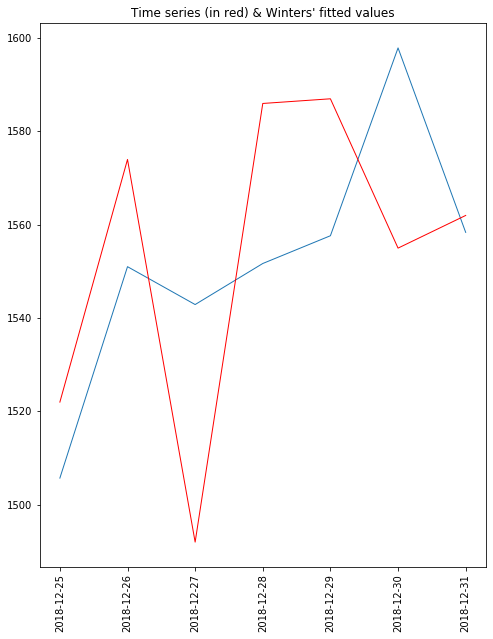


Winters' Forecasts for 7 periods:
2019-01-01    1521.019332
2019-01-02    1561.130325
2019-01-03    1545.299584
2019-01-04    1571.433199
2019-01-05    1565.871463
2019-01-06    1596.277273
2019-01-07    1570.884235
Freq: D, dtype: float64


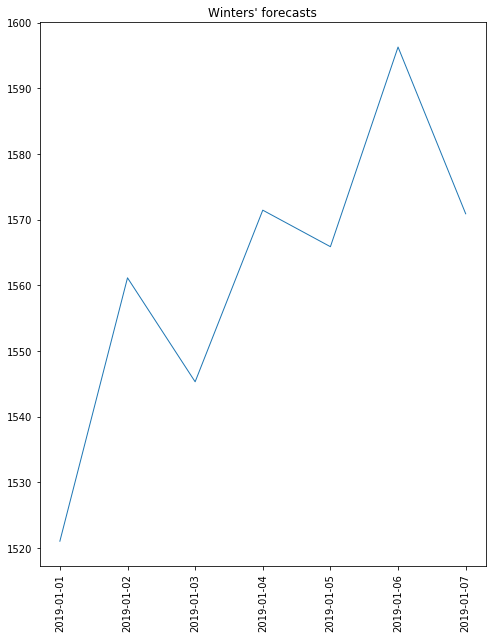


Multiplicative Holt's Double Exponential Fit:

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   30
Model:             ExponentialSmoothing   SSE                          79253.132
Optimized:                         True   AIC                            244.376
Trend:                   Multiplicative   BIC                            249.981
Seasonal:                          None   AICC                           248.028
Seasonal Periods:                  None   Date:                 Wed, 11 Mar 2020
Box-Cox:                          False   Time:                         23:28:25
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.5878404                alpha        

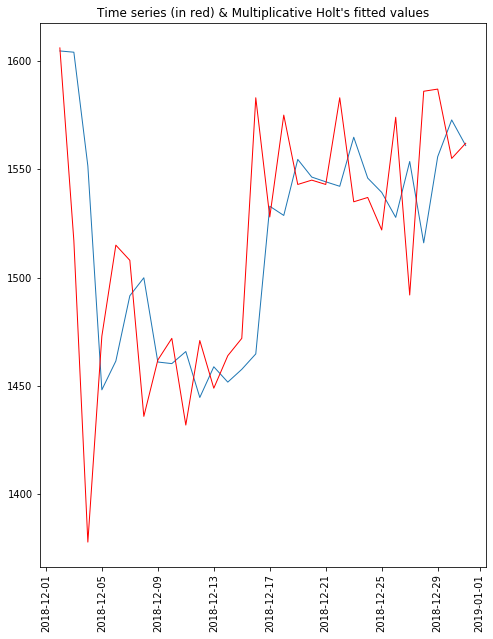


Last 7 observations:


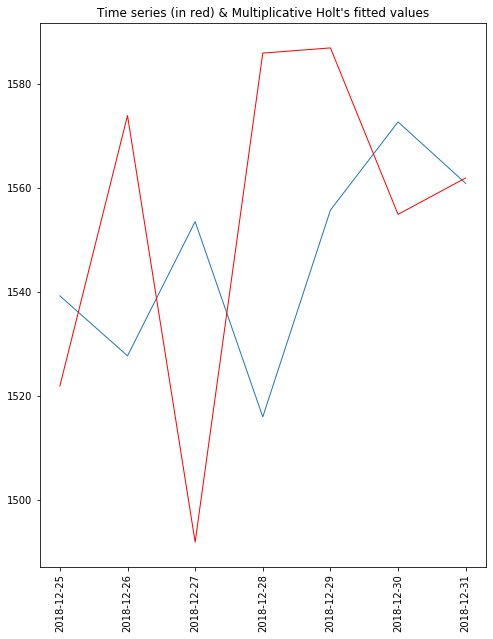


Multiplicative Holt's Forecasts for 7 periods:
2019-01-01    1560.207545
2019-01-02    1558.844786
2019-01-03    1557.483217
2019-01-04    1556.122837
2019-01-05    1554.763646
2019-01-06    1553.405642
2019-01-07    1552.048824
Freq: D, dtype: float64


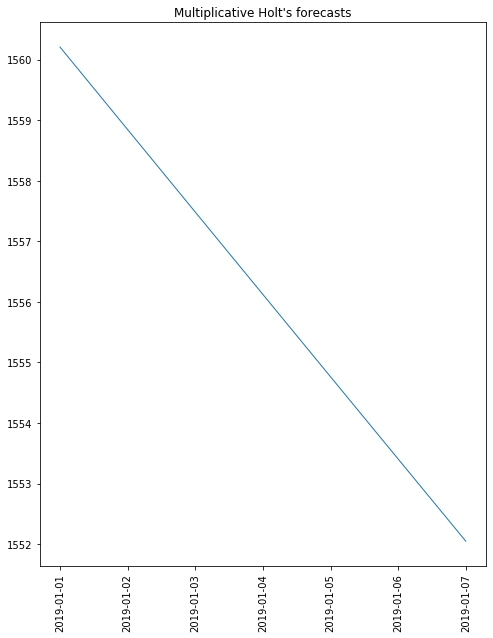

In [22]:
### 1-month fitted values
d0 = d.copy()
d0 = d0[-30:]

for i in range(1,4):
    if i == 1:
        #Simple Exponential:
        md = ExponentialSmoothing(d0.astype('double'), freq=freq1, seasonal_periods=period1, missing='raise')
        mtd = 'Simple Exponential'
    elif i == 2:
        #Holt's:
        md = ExponentialSmoothing(d0.astype('double'), trend='add', freq=freq1, seasonal_periods=period1)
        #md = Holt(d0.astype('double'))
        mtd = "Holt's"
    else:
        #Winters':
        try:
            md = ExponentialSmoothing(d0.astype('double'), trend='add', seasonal='mul', freq=freq1, seasonal_periods=period1)
        except:
            #necesary for Azure server; changing to default seasonal='add', which means Holt's instead of Winters':
            md = ExponentialSmoothing(d0.astype('double'), trend='add', freq=freq1, seasonal_periods=period1)
            print("To get around a crash, done Holt's instead of Winters'.")
        mtd = "Winters'"

    mf = md.fit()
        
    rmse = round(np.sqrt(mean_squared_error(d0, mf.fittedvalues)),3) # assumes all years are 365 days
    rmse_all['1 Month'].append(rmse)
    
    if i == 1:
        print("\nSimple Exponential Fit:\n")
    elif i == 2:
        print("\nHolt's Double Exponential Fit:\n")
    else:
        print("\nWinters' Triple Exponential Fit:\n")

    print(mf.summary()) #no output on Azure server; only shows 'None'
    #print(np.array(list(mf.params.items())))
    print('\nLast', npr, 'observations:')
    pl.plot(mf.fittedvalues[-npr:])
    pl.plot(d0[-npr:], color='red')
    pl.xticks(rotation=90)
    pl.title('Time series (in red) & '+('Simple Exponential' if i==1 else ("Holt's" if i==2 else "Winters'"))+' fitted values')
    pl.show()
    
    if nr > period1:
        print('\nLast', period1, 'observations:')
        pl.plot(mf.fittedvalues[-period1:])
        pl.plot(d0[-period1:], color='red')
        pl.xticks(rotation=90)
        pl.title('Time series (in red) & '+('Simple Exponential' if i==1 else ("Holt's" if i==2 else "Winters'"))+' fitted values')
        pl.show()
    
    print('\n'+mtd, 'Forecasts for', period1, 'periods:')
    #forecast a full cycle:
    #prd = mf.predict(start=d0.shape[0], end=d0.shape[0]+period1-1)
    prd = mf.forecast(period1) #same as above
    print(prd)
    pl.xticks(rotation=90)
    pl.plot(prd)
    pl.title(('Simple Exponential' if i==1 else ("Holt's" if i==2 else "Winters'"))+' forecasts')
    pl.show()

if 'mf2' in vars() or 'mf2' in globals() or 'mf2' in vars(__builtins__):
    del mf2 #delete d0 if defined during previous run
    
#alternate Holt's, giving same results as earlier 'Double Exponential':
try:
    #mf2 = Holt(d0.astype('double')).fit()
    mf2 = ExponentialSmoothing(d0.astype('double'), trend='mul', freq=freq1, seasonal_periods=period1).fit()
except:
    #necesary for Azure server; changing to default trend='add', yielding same results as above Holt's:
    mf2 = ExponentialSmoothing(d0.astype('double'), freq=freq1, seasonal_periods=period1).fit()
    print("To get around a crash, done additive instead of multiplicative Holt's.")
    
print("\nMultiplicative Holt's Double Exponential Fit:\n")
#print(mf2.params.items())
print(mf2.summary())

rmse = round(np.sqrt(mean_squared_error(d0, mf2.fittedvalues)),3) # assumes all years are 365 days
rmse_all['1 Month'].append(rmse)

print('\nLast', npr, 'observations:')
pl.plot(mf2.fittedvalues[-npr:])
pl.plot(d0[-npr:], color='red')
pl.xticks(rotation=90)
pl.title("Time series (in red) & Multiplicative Holt's fitted values")
pl.show()

if nr > period1:
    print('\nLast', period1, 'observations:')
    pl.plot(mf2.fittedvalues[-period1:])
    pl.plot(d0[-period1:], color='red')
    pl.xticks(rotation=90)
    pl.title("Time series (in red) & Multiplicative Holt's fitted values")
    pl.show()

print("\nMultiplicative Holt's Forecasts for", period1, "periods:")
prd = mf2.forecast(period1)
print(prd)
pl.xticks(rotation=90)
pl.plot(prd)
pl.title("Multiplicative Holt's forecasts")
pl.show()

#### 1-Week Values (8 Data Points)


Simple Exponential Fit:

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                    8
Model:             ExponentialSmoothing   SSE                           7698.875
Optimized:                         True   AIC                             58.955
Trend:                             None   BIC                             59.114
Seasonal:                          None   AICC                            72.288
Seasonal Periods:                  None   Date:                 Wed, 11 Mar 2020
Box-Cox:                          False   Time:                         23:28:26
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level             0.000000                alpha                 True
initial_

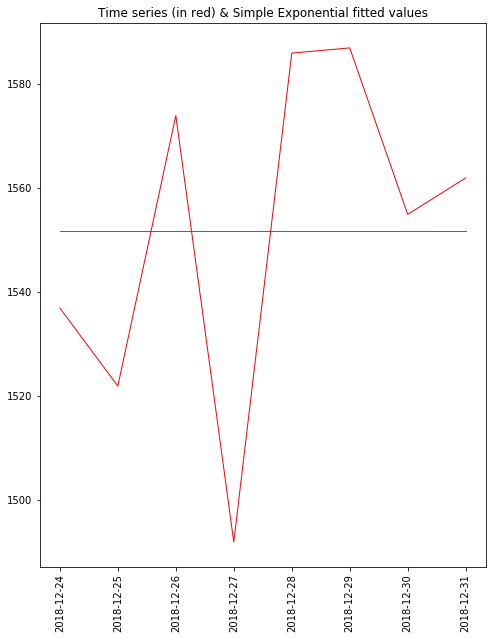


Last 7 observations:


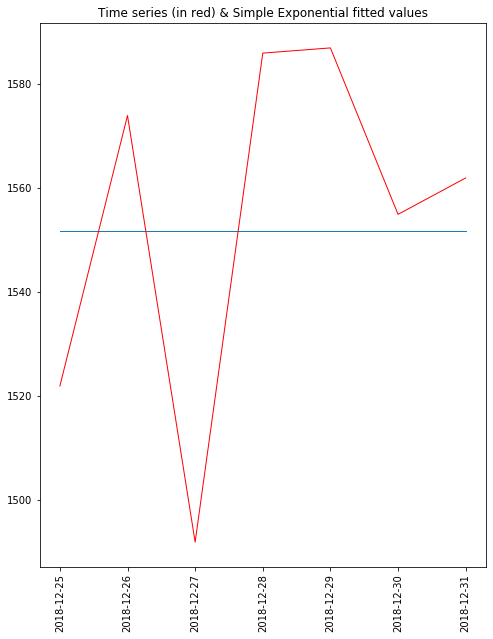


Simple Exponential Forecasts for 7 periods:
2019-01-01    1551.874991
2019-01-02    1551.874991
2019-01-03    1551.874991
2019-01-04    1551.874991
2019-01-05    1551.874991
2019-01-06    1551.874991
2019-01-07    1551.874991
Freq: D, dtype: float64


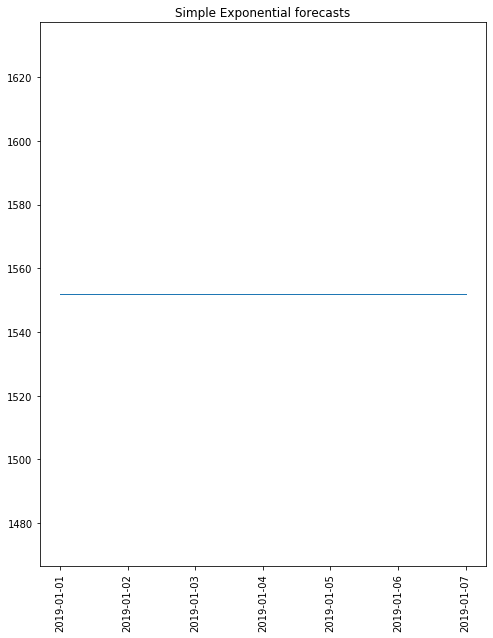

C:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)



Holt's Double Exponential Fit:

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                    8
Model:             ExponentialSmoothing   SSE                          12028.860
Optimized:                         True   AIC                             66.525
Trend:                         Additive   BIC                             66.843
Seasonal:                          None   AICC                           150.525
Seasonal Periods:                  None   Date:                 Wed, 11 Mar 2020
Box-Cox:                          False   Time:                         23:28:27
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.4210526                alpha                 True
s

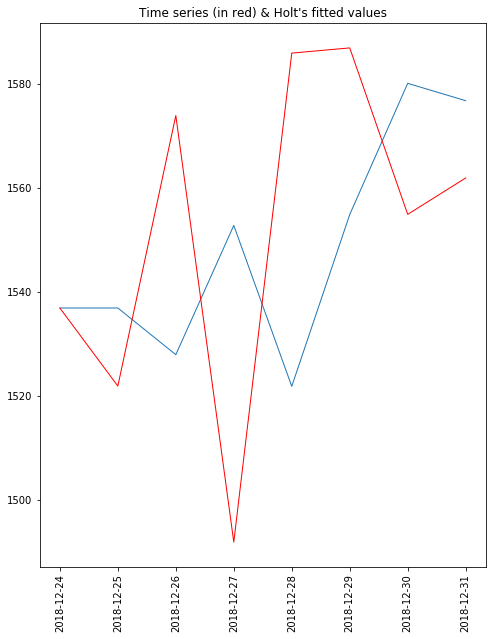


Last 7 observations:


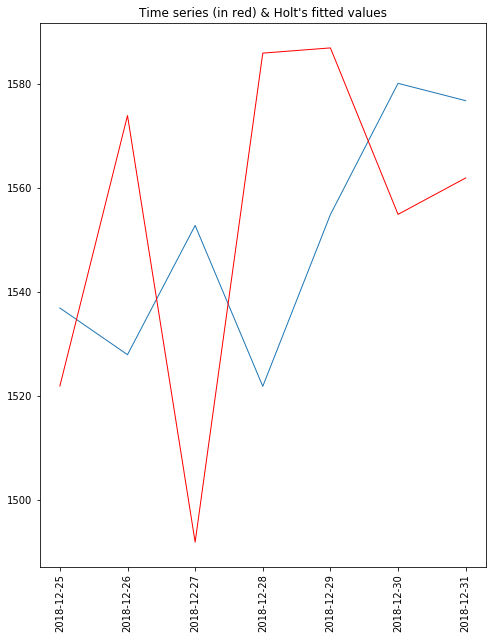


Holt's Forecasts for 7 periods:
2019-01-01    1575.234008
2019-01-02    1579.869293
2019-01-03    1584.504577
2019-01-04    1589.139861
2019-01-05    1593.775146
2019-01-06    1598.410430
2019-01-07    1603.045714
Freq: D, dtype: float64


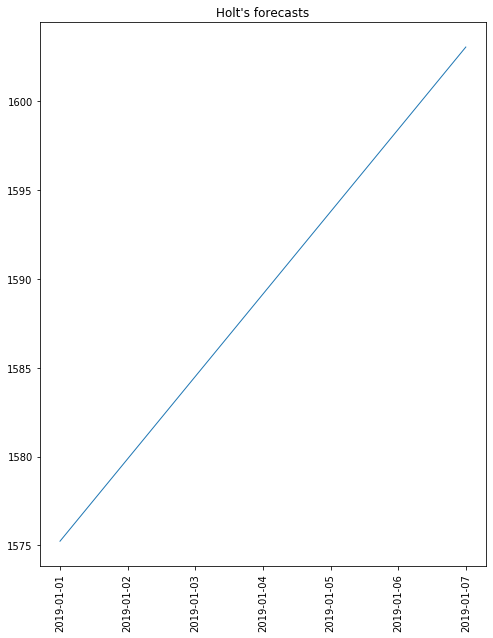


Winters' Triple Exponential Fit:

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                    8
Model:             ExponentialSmoothing   SSE                             39.682
Optimized:                         True   AIC                             34.812
Trend:                         Additive   BIC                             35.686
Seasonal:                Multiplicative   AICC                               inf
Seasonal Periods:                     7   Date:                 Wed, 11 Mar 2020
Box-Cox:                          False   Time:                         23:28:28
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0084275                alpha            

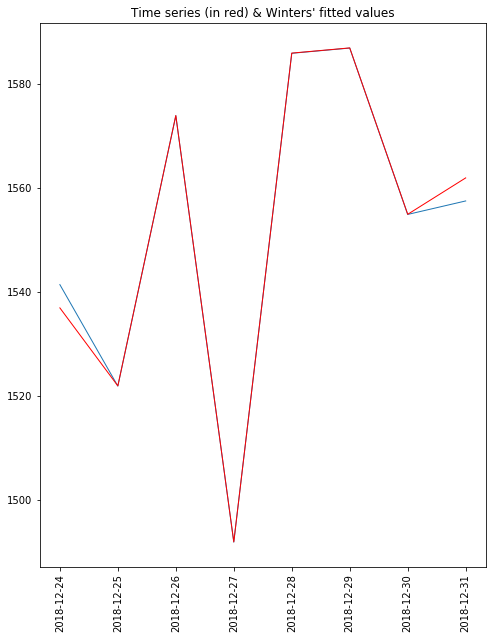


Last 7 observations:


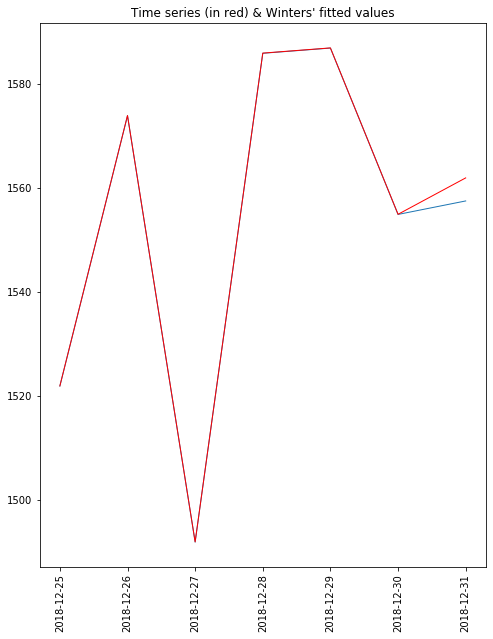


Winters' Forecasts for 7 periods:
2019-01-01    1537.899559
2019-01-02    1590.421120
2019-01-03    1507.539483
2019-01-04    1602.501845
2019-01-05    1603.492184
2019-01-06    1571.140111
2019-01-07    1573.736416
Freq: D, dtype: float64


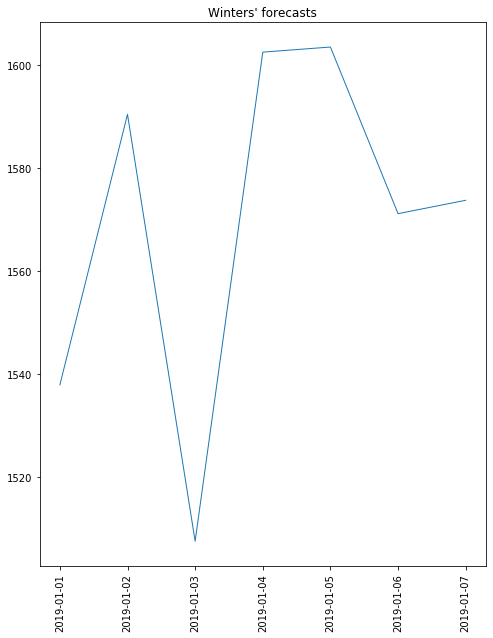

C:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)



Multiplicative Holt's Double Exponential Fit:

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                    8
Model:             ExponentialSmoothing   SSE                          14600.740
Optimized:                         True   AIC                             68.075
Trend:                   Multiplicative   BIC                             68.393
Seasonal:                          None   AICC                           152.075
Seasonal Periods:                  None   Date:                 Wed, 11 Mar 2020
Box-Cox:                          False   Time:                         23:28:29
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.4210526                alpha        

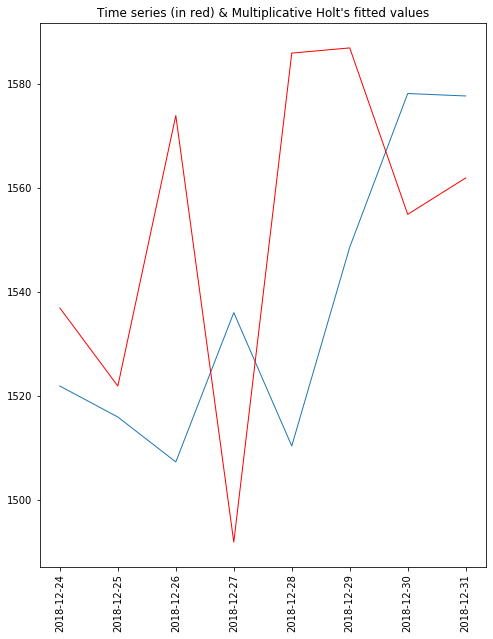


Last 7 observations:


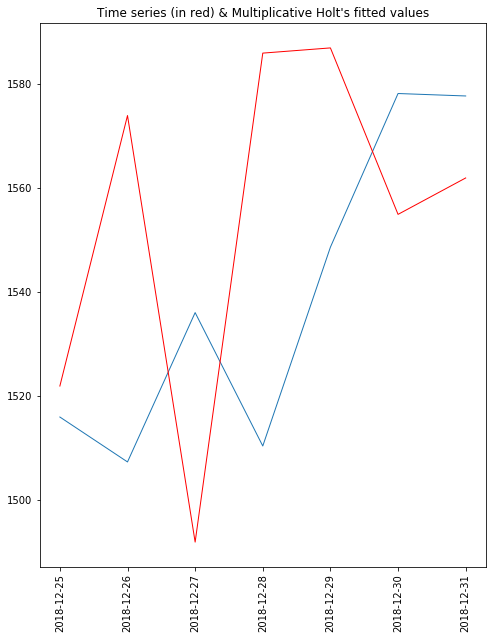


Multiplicative Holt's Forecasts for 7 periods:
2019-01-01    1577.652614
2019-01-02    1584.207219
2019-01-03    1590.789056
2019-01-04    1597.398238
2019-01-05    1604.034879
2019-01-06    1610.699093
2019-01-07    1617.390994
Freq: D, dtype: float64


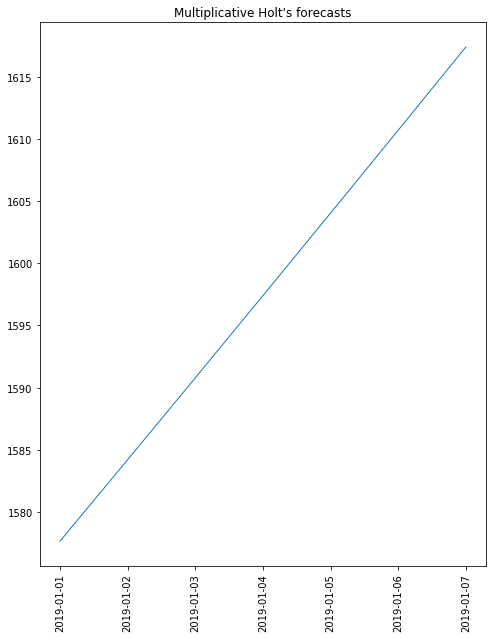

In [23]:
### 1-week fitted values
d0 = d.copy()
d0 = d0[-8:]

for i in range(1,4):
    if i == 1:
        #Simple Exponential:
        md = ExponentialSmoothing(d0.astype('double'), freq=freq1, seasonal_periods=period1, missing='raise')
        mtd = 'Simple Exponential'
    elif i == 2:
        #Holt's:
        md = ExponentialSmoothing(d0.astype('double'), trend='add', freq=freq1, seasonal_periods=period1)
        #md = Holt(d0.astype('double'))
        mtd = "Holt's"
    else:
        #Winters':
        try:
            md = ExponentialSmoothing(d0.astype('double'), trend='add', seasonal='mul', freq=freq1, seasonal_periods=period1)
        except:
            #necesary for Azure server; changing to default seasonal='add', which means Holt's instead of Winters':
            md = ExponentialSmoothing(d0.astype('double'), trend='add', freq=freq1, seasonal_periods=period1)
            print("To get around a crash, done Holt's instead of Winters'.")
        mtd = "Winters'"

    mf = md.fit()
        
    rmse = round(np.sqrt(mean_squared_error(d0, mf.fittedvalues)),3) # assumes all years are 365 days
    rmse_all['1 Week (8 days)'].append(rmse)
    
    if i == 1:
        print("\nSimple Exponential Fit:\n")
    elif i == 2:
        print("\nHolt's Double Exponential Fit:\n")
    else:
        print("\nWinters' Triple Exponential Fit:\n")

    print(mf.summary()) #no output on Azure server; only shows 'None'
    #print(np.array(list(mf.params.items())))
    print('\nLast', npr, 'observations:')
    pl.plot(mf.fittedvalues[-npr:])
    pl.plot(d0[-npr:], color='red')
    pl.xticks(rotation=90)
    pl.title('Time series (in red) & '+('Simple Exponential' if i==1 else ("Holt's" if i==2 else "Winters'"))+' fitted values')
    pl.show()
    
    if nr > period1:
        print('\nLast', period1, 'observations:')
        pl.plot(mf.fittedvalues[-period1:])
        pl.plot(d0[-period1:], color='red')
        pl.xticks(rotation=90)
        pl.title('Time series (in red) & '+('Simple Exponential' if i==1 else ("Holt's" if i==2 else "Winters'"))+' fitted values')
        pl.show()
    
    print('\n'+mtd, 'Forecasts for', period1, 'periods:')
    #forecast a full cycle:
    #prd = mf.predict(start=d0.shape[0], end=d0.shape[0]+period1-1)
    prd = mf.forecast(period1) #same as above
    print(prd)
    pl.xticks(rotation=90)
    pl.plot(prd)
    pl.title(('Simple Exponential' if i==1 else ("Holt's" if i==2 else "Winters'"))+' forecasts')
    pl.show()

if 'mf2' in vars() or 'mf2' in globals() or 'mf2' in vars(__builtins__):
    del mf2 #delete d0 if defined during previous run
    
#alternate Holt's, giving same results as earlier 'Double Exponential':
try:
    #mf2 = Holt(d0.astype('double')).fit()
    mf2 = ExponentialSmoothing(d0.astype('double'), trend='mul', freq=freq1, seasonal_periods=period1).fit()
except:
    #necesary for Azure server; changing to default trend='add', yielding same results as above Holt's:
    mf2 = ExponentialSmoothing(d0.astype('double'), freq=freq1, seasonal_periods=period1).fit()
    print("To get around a crash, done additive instead of multiplicative Holt's.")
    
print("\nMultiplicative Holt's Double Exponential Fit:\n")
#print(mf2.params.items())
print(mf2.summary())

rmse = round(np.sqrt(mean_squared_error(d0, mf2.fittedvalues)),3) # assumes all years are 365 days
rmse_all['1 Week (8 days)'].append(rmse)

print('\nLast', npr, 'observations:')
pl.plot(mf2.fittedvalues[-npr:])
pl.plot(d0[-npr:], color='red')
pl.xticks(rotation=90)
pl.title("Time series (in red) & Multiplicative Holt's fitted values")
pl.show()

if nr > period1:
    print('\nLast', period1, 'observations:')
    pl.plot(mf2.fittedvalues[-period1:])
    pl.plot(d0[-period1:], color='red')
    pl.xticks(rotation=90)
    pl.title("Time series (in red) & Multiplicative Holt's fitted values")
    pl.show()

print("\nMultiplicative Holt's Forecasts for", period1, "periods:")
prd = mf2.forecast(period1)
print(prd)
pl.xticks(rotation=90)
pl.plot(prd)
pl.title("Multiplicative Holt's forecasts")
pl.show()

#### All Values (freq=annual)


Simple Exponential Fit:

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                17897
Model:             ExponentialSmoothing   SSE                       64381547.167
Optimized:                         True   AIC                         146543.727
Trend:                             None   BIC                         146559.312
Seasonal:                          None   AICC                        146543.730
Seasonal Periods:                  None   Date:                 Wed, 11 Mar 2020
Box-Cox:                          False   Time:                         23:28:30
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.4899489                alpha                 True
initial_

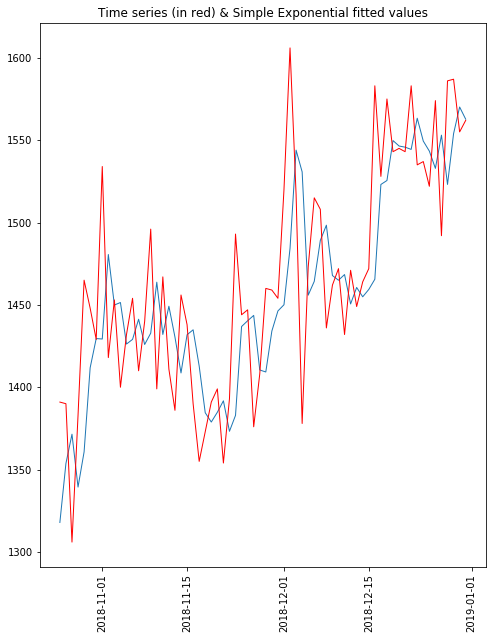


Last 365 observations:


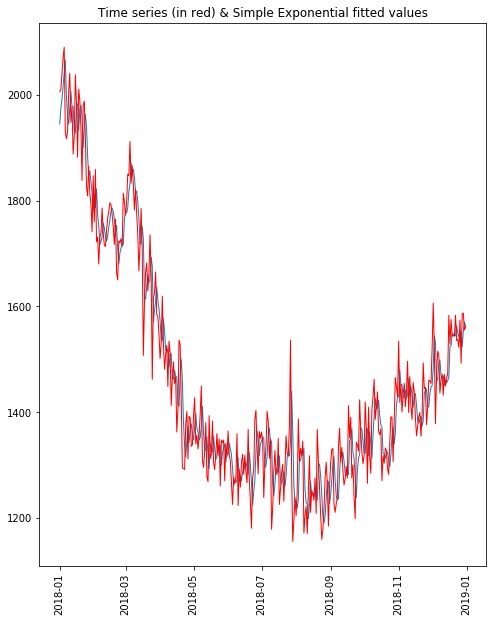


Simple Exponential Forecasts for 365 periods:
2019-01-01    1562.366733
2019-01-02    1562.366733
2019-01-03    1562.366733
2019-01-04    1562.366733
2019-01-05    1562.366733
                 ...     
2019-12-27    1562.366733
2019-12-28    1562.366733
2019-12-29    1562.366733
2019-12-30    1562.366733
2019-12-31    1562.366733
Freq: D, Length: 365, dtype: float64


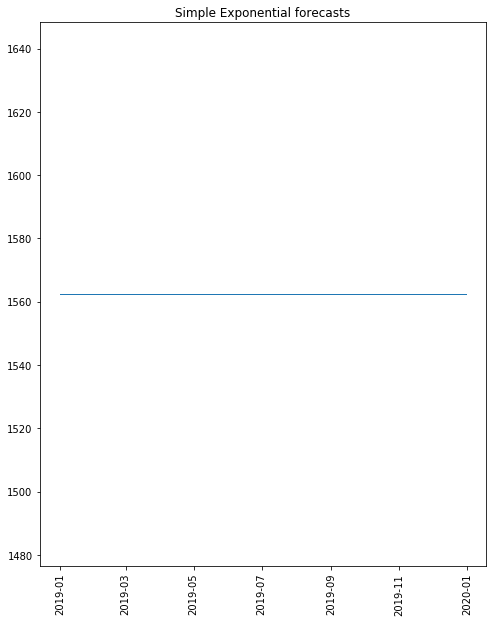


Holt's Double Exponential Fit:

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                17897
Model:             ExponentialSmoothing   SSE                       64381576.883
Optimized:                         True   AIC                         146547.736
Trend:                         Additive   BIC                         146578.905
Seasonal:                          None   AICC                        146547.740
Seasonal Periods:                  None   Date:                 Wed, 11 Mar 2020
Box-Cox:                          False   Time:                         23:28:31
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.4899332                alpha                 True
s

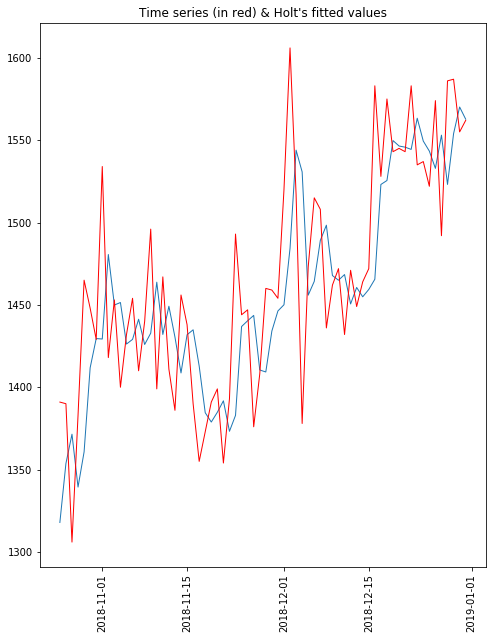


Last 365 observations:


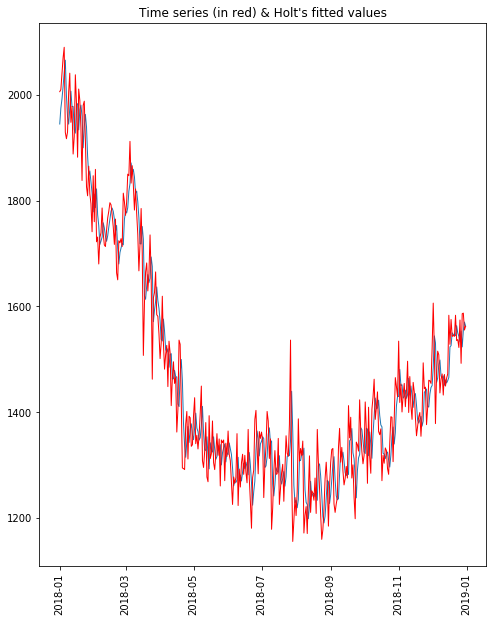


Holt's Forecasts for 365 periods:
2019-01-01    1562.366651
2019-01-02    1562.366651
2019-01-03    1562.366651
2019-01-04    1562.366651
2019-01-05    1562.366651
                 ...     
2019-12-27    1562.366651
2019-12-28    1562.366651
2019-12-29    1562.366651
2019-12-30    1562.366651
2019-12-31    1562.366651
Freq: D, Length: 365, dtype: float64


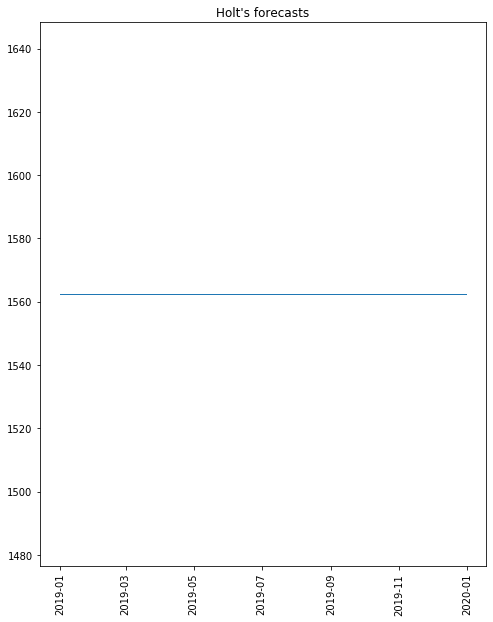

C:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)



Winters' Triple Exponential Fit:

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                17897
Model:             ExponentialSmoothing   SSE                       63692405.077
Optimized:                         True   AIC                         147085.125
Trend:                         Additive   BIC                         149960.516
Seasonal:                Multiplicative   AICC                        147100.875
Seasonal Periods:                   365   Date:                 Wed, 11 Mar 2020
Box-Cox:                          False   Time:                         23:28:37
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.4820375                alpha         

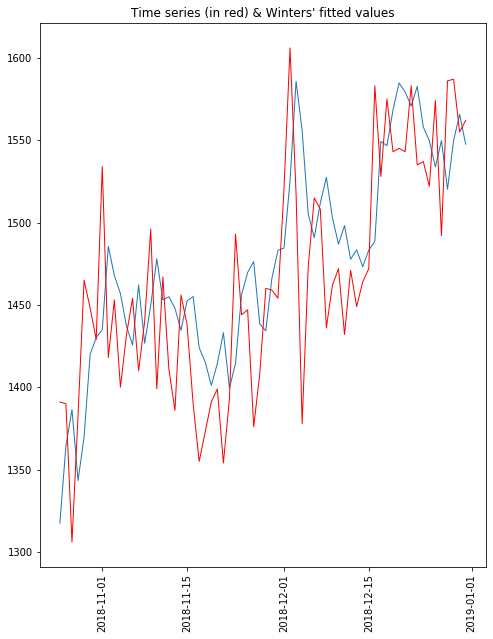


Last 365 observations:


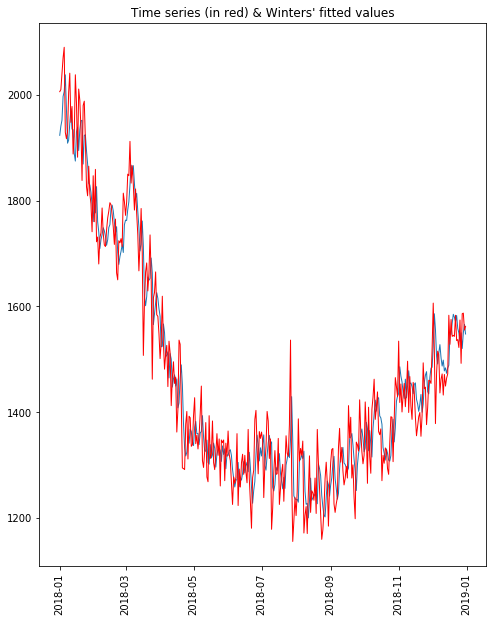


Winters' Forecasts for 365 periods:
2019-01-01    1545.708809
2019-01-02    1528.086411
2019-01-03    1510.931223
2019-01-04    1512.873316
2019-01-05    1493.447394
                 ...     
2019-12-27    1571.771069
2019-12-28    1569.949040
2019-12-29    1567.657925
2019-12-30    1565.676305
2019-12-31    1552.636162
Freq: D, Length: 365, dtype: float64


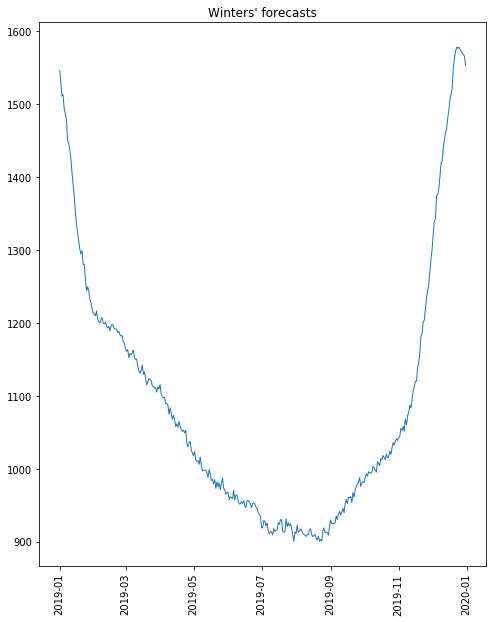


Multiplicative Holt's Double Exponential Fit:

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                17897
Model:             ExponentialSmoothing   SSE                       64375244.553
Optimized:                         True   AIC                         146545.975
Trend:                   Multiplicative   BIC                         146577.145
Seasonal:                          None   AICC                        146545.980
Seasonal Periods:                  None   Date:                 Wed, 11 Mar 2020
Box-Cox:                          False   Time:                         23:28:39
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.4906201                alpha        

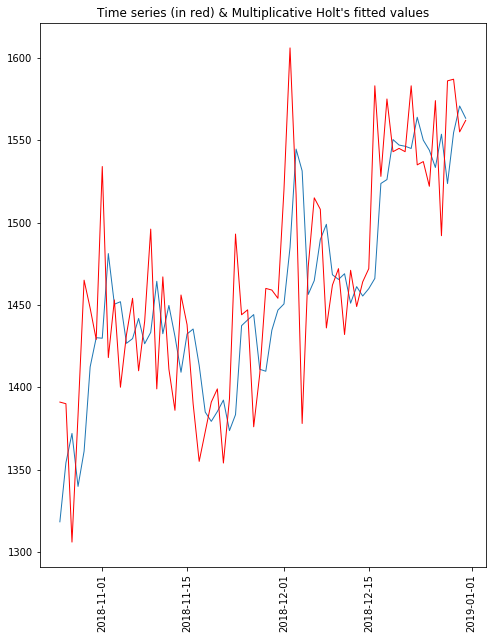


Last 365 observations:


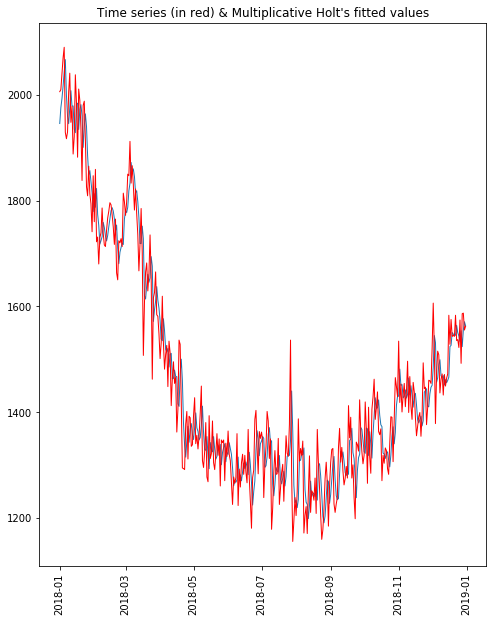


Multiplicative Holt's Forecasts for 365 periods:
2019-01-01    1562.941231
2019-01-02    1563.221869
2019-01-03    1563.502559
2019-01-04    1563.783298
2019-01-05    1564.064088
                 ...     
2019-12-27    1667.298339
2019-12-28    1667.597716
2019-12-29    1667.897147
2019-12-30    1668.196631
2019-12-31    1668.496169
Freq: D, Length: 365, dtype: float64


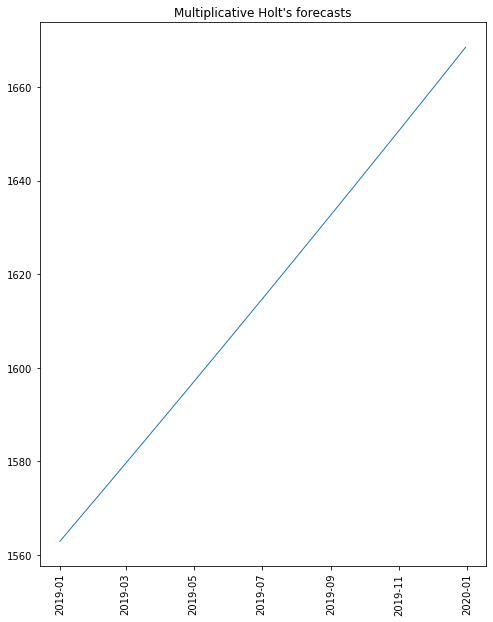

In [24]:
### Full fitted values
period1 = 365 #yearly season, 365 periods in an annual season (roughly)
rmse_yearly = []

for i in range(1,4):
    if i == 1:
        #Simple Exponential:
        md = ExponentialSmoothing(d.astype('double'), freq=freq1, seasonal_periods=period1, missing='raise')
        mtd = 'Simple Exponential'
    elif i == 2:
        #Holt's:
        md = ExponentialSmoothing(d.astype('double'), trend='add', freq=freq1, seasonal_periods=period1)
        #md = Holt(d.astype('double'))
        mtd = "Holt's"
    else:
        #Winters':
        try:
            md = ExponentialSmoothing(d.astype('double'), trend='add', seasonal='mul', freq=freq1, seasonal_periods=period1)
        except:
            #necesary for Azure server; changing to default seasonal='add', which means Holt's instead of Winters':
            md = ExponentialSmoothing(d.astype('double'), trend='add', freq=freq1, seasonal_periods=period1)
            print("To get around a crash, done Holt's instead of Winters'.")
        mtd = "Winters'"

    mf = md.fit()
    
    rmse = round(np.sqrt(mean_squared_error(d, mf.fittedvalues)),3) # assumes all years are 365 days
    rmse_yearly.append(rmse)
    
    if i == 1:
        print("\nSimple Exponential Fit:\n")
    elif i == 2:
        print("\nHolt's Double Exponential Fit:\n")
    else:
        print("\nWinters' Triple Exponential Fit:\n")

    print(mf.summary()) #no output on Azure server; only shows 'None'
    #print(np.array(list(mf.params.items())))
    print('\nLast', npr, 'observations:')
    pl.plot(mf.fittedvalues[-npr:])
    pl.plot(d[-npr:], color='red')
    pl.xticks(rotation=90)
    pl.title('Time series (in red) & '+('Simple Exponential' if i==1 else ("Holt's" if i==2 else "Winters'"))+' fitted values')
    pl.show()
    
    if nr > period1:
        print('\nLast', period1, 'observations:')
        pl.plot(mf.fittedvalues[-period1:])
        pl.plot(d[-period1:], color='red')
        pl.xticks(rotation=90)
        pl.title('Time series (in red) & '+('Simple Exponential' if i==1 else ("Holt's" if i==2 else "Winters'"))+' fitted values')
        pl.show()
    
    print('\n'+mtd, 'Forecasts for', period1, 'periods:')
    #forecast a full cycle:
    #prd = mf.predict(start=d.shape[0], end=dt.shape[0]+period1-1)
    prd = mf.forecast(period1) #same as above
    print(prd)
    pl.xticks(rotation=90)
    pl.plot(prd)
    pl.title(('Simple Exponential' if i==1 else ("Holt's" if i==2 else "Winters'"))+' forecasts')
    pl.show()

if 'mf2' in vars() or 'mf2' in globals() or 'mf2' in vars(__builtins__):
    del mf2 #delete d if defined during previous run
    
#alternate Holt's, giving same results as earlier 'Double Exponential':
try:
    #mf2 = Holt(d.astype('double')).fit()
    mf2 = ExponentialSmoothing(d.astype('double'), trend='mul', freq=freq1, seasonal_periods=period1).fit()
except:
    #necesary for Azure server; changing to default trend='add', yielding same results as above Holt's:
    mf2 = ExponentialSmoothing(d.astype('double'), freq=freq1, seasonal_periods=period1).fit()
    print("To get around a crash, done additive instead of multiplicative Holt's.")
    
print("\nMultiplicative Holt's Double Exponential Fit:\n")
#print(mf2.params.items())
print(mf2.summary())

rmse = round(np.sqrt(mean_squared_error(d, mf2.fittedvalues)),3) # assumes all years are 365 days
rmse_yearly.append(rmse)

print('\nLast', npr, 'observations:')
pl.plot(mf2.fittedvalues[-npr:])
pl.plot(d[-npr:], color='red')
pl.xticks(rotation=90)
pl.title("Time series (in red) & Multiplicative Holt's fitted values")
pl.show()

if nr > period1:
    print('\nLast', period1, 'observations:')
    pl.plot(mf2.fittedvalues[-period1:])
    pl.plot(d[-period1:], color='red')
    pl.xticks(rotation=90)
    pl.title("Time series (in red) & Multiplicative Holt's fitted values")
    pl.show()

print("\nMultiplicative Holt's Forecasts for", period1, "periods:")
prd = mf2.forecast(period1)
print(prd)
pl.xticks(rotation=90)
pl.plot(prd)
pl.title("Multiplicative Holt's forecasts")
pl.show()

#### RMSE Summary Table

In [25]:
rmse_all.update({'All (freq=annual)': rmse_yearly})
rmse_all

{'1 Week (8 days)': [31.022, 38.776, 2.227, 42.721],
 '1 Month': [49.225, 46.706, 43.923, 51.398],
 '1 Year': [60.285, 60.285, 58.949, 59.957],
 'All': [59.978, 59.978, 58.568, 59.975],
 'All (freq=annual)': [59.978, 59.978, 59.656, 59.975]}

In [26]:
df_rmse = pd.DataFrame(rmse_all, index=['SES', 'Holt\'s (Add)', 'Winter\'s', 'Holt\'s (Mul)'])
df_rmse = df_rmse.T
df_rmse

,SES,Holt's (Add),Winter's,Holt's (Mul)
1 Week (8 days),31.022,38.776,2.227,42.721
1 Month,49.225,46.706,43.923,51.398
1 Year,60.285,60.285,58.949,59.957
All,59.978,59.978,58.568,59.975
All (freq=annual),59.978,59.978,59.656,59.975
